In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [45]:
pip install plotly==4.9.0

Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_csv('td_num_imputed_cat_unimputed_dropedna_target.csv')

In [19]:
df.head()

Unnamed: 0  latitude  longitude  nperpcap     nkill  nkillter    nwound  \
0           0 -0.444783  -1.540087  0.074550  0.444343 -0.360005 -0.770908   
1           1 -0.388388  -1.798341  0.074550 -0.924496 -0.360005 -0.770908   
2           2 -0.625239   2.054074 -0.698187  0.444343  0.577422 -0.770908   
3           3  0.833952  -0.353311  1.800576 -0.924496 -0.047530 -0.770908   
4           5 -2.298085  -1.413866  0.074550 -0.924496 -0.360005 -0.770908   

   nwoundte       eventid  iyear  ...  weaptype1_txt  targtype1  \
0 -0.149083  197000000001   1970  ...        Unknown         14   
1 -0.149083  197000000002   1970  ...        Unknown          7   
2 -0.149083  197001000001   1970  ...        Unknown         10   
3 -0.149083  197001000002   1970  ...     Explosives          7   
4 -0.149083  197001010002   1970  ...       Firearms          3   

                 targtype1_txt  natlty1         natlty1_txt  individual  \
0  Private Citizens & Property     58.0  Dominican Republic           0   
1      Government (Diplomatic)     21.0             Belgium           0   
2          Journalists & Media    217.0       United States           0   
3      Government (Diplomatic)    217.0       United States           0   
4                       Police    217.0       United States           0   

                                gname  claimed property  doubtterr  
0                              MANO-D      NaN      0.0        0.0  
1  23rd of September Communist League      NaN      0.0        0.0  
2                             Unknown      NaN      0.0        0.0  
3                             Unknown      NaN      1.0        0.0  
4                  Black Nationalists      0.0      1.0        0.0  

[5 rows x 38 columns]

In [4]:
df.shape

(167906, 38)

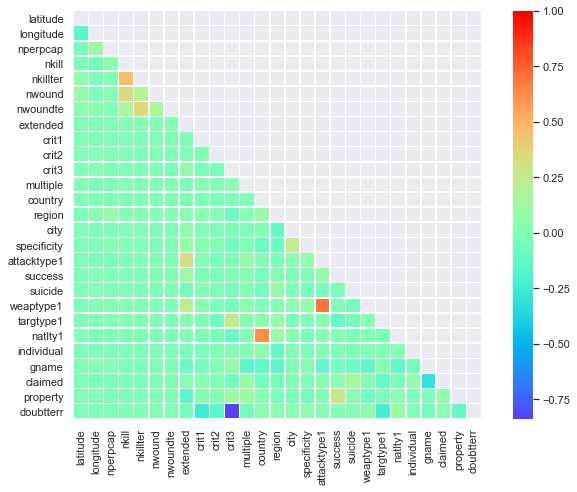

In [77]:
plt.figure(figsize=(10,7))
corr_back = df1.corr()


mask = np.zeros_like(corr_back, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(corr_back, mask=mask, center=0, square=True, linewidths=.5,cmap='rainbow')

plt.show()

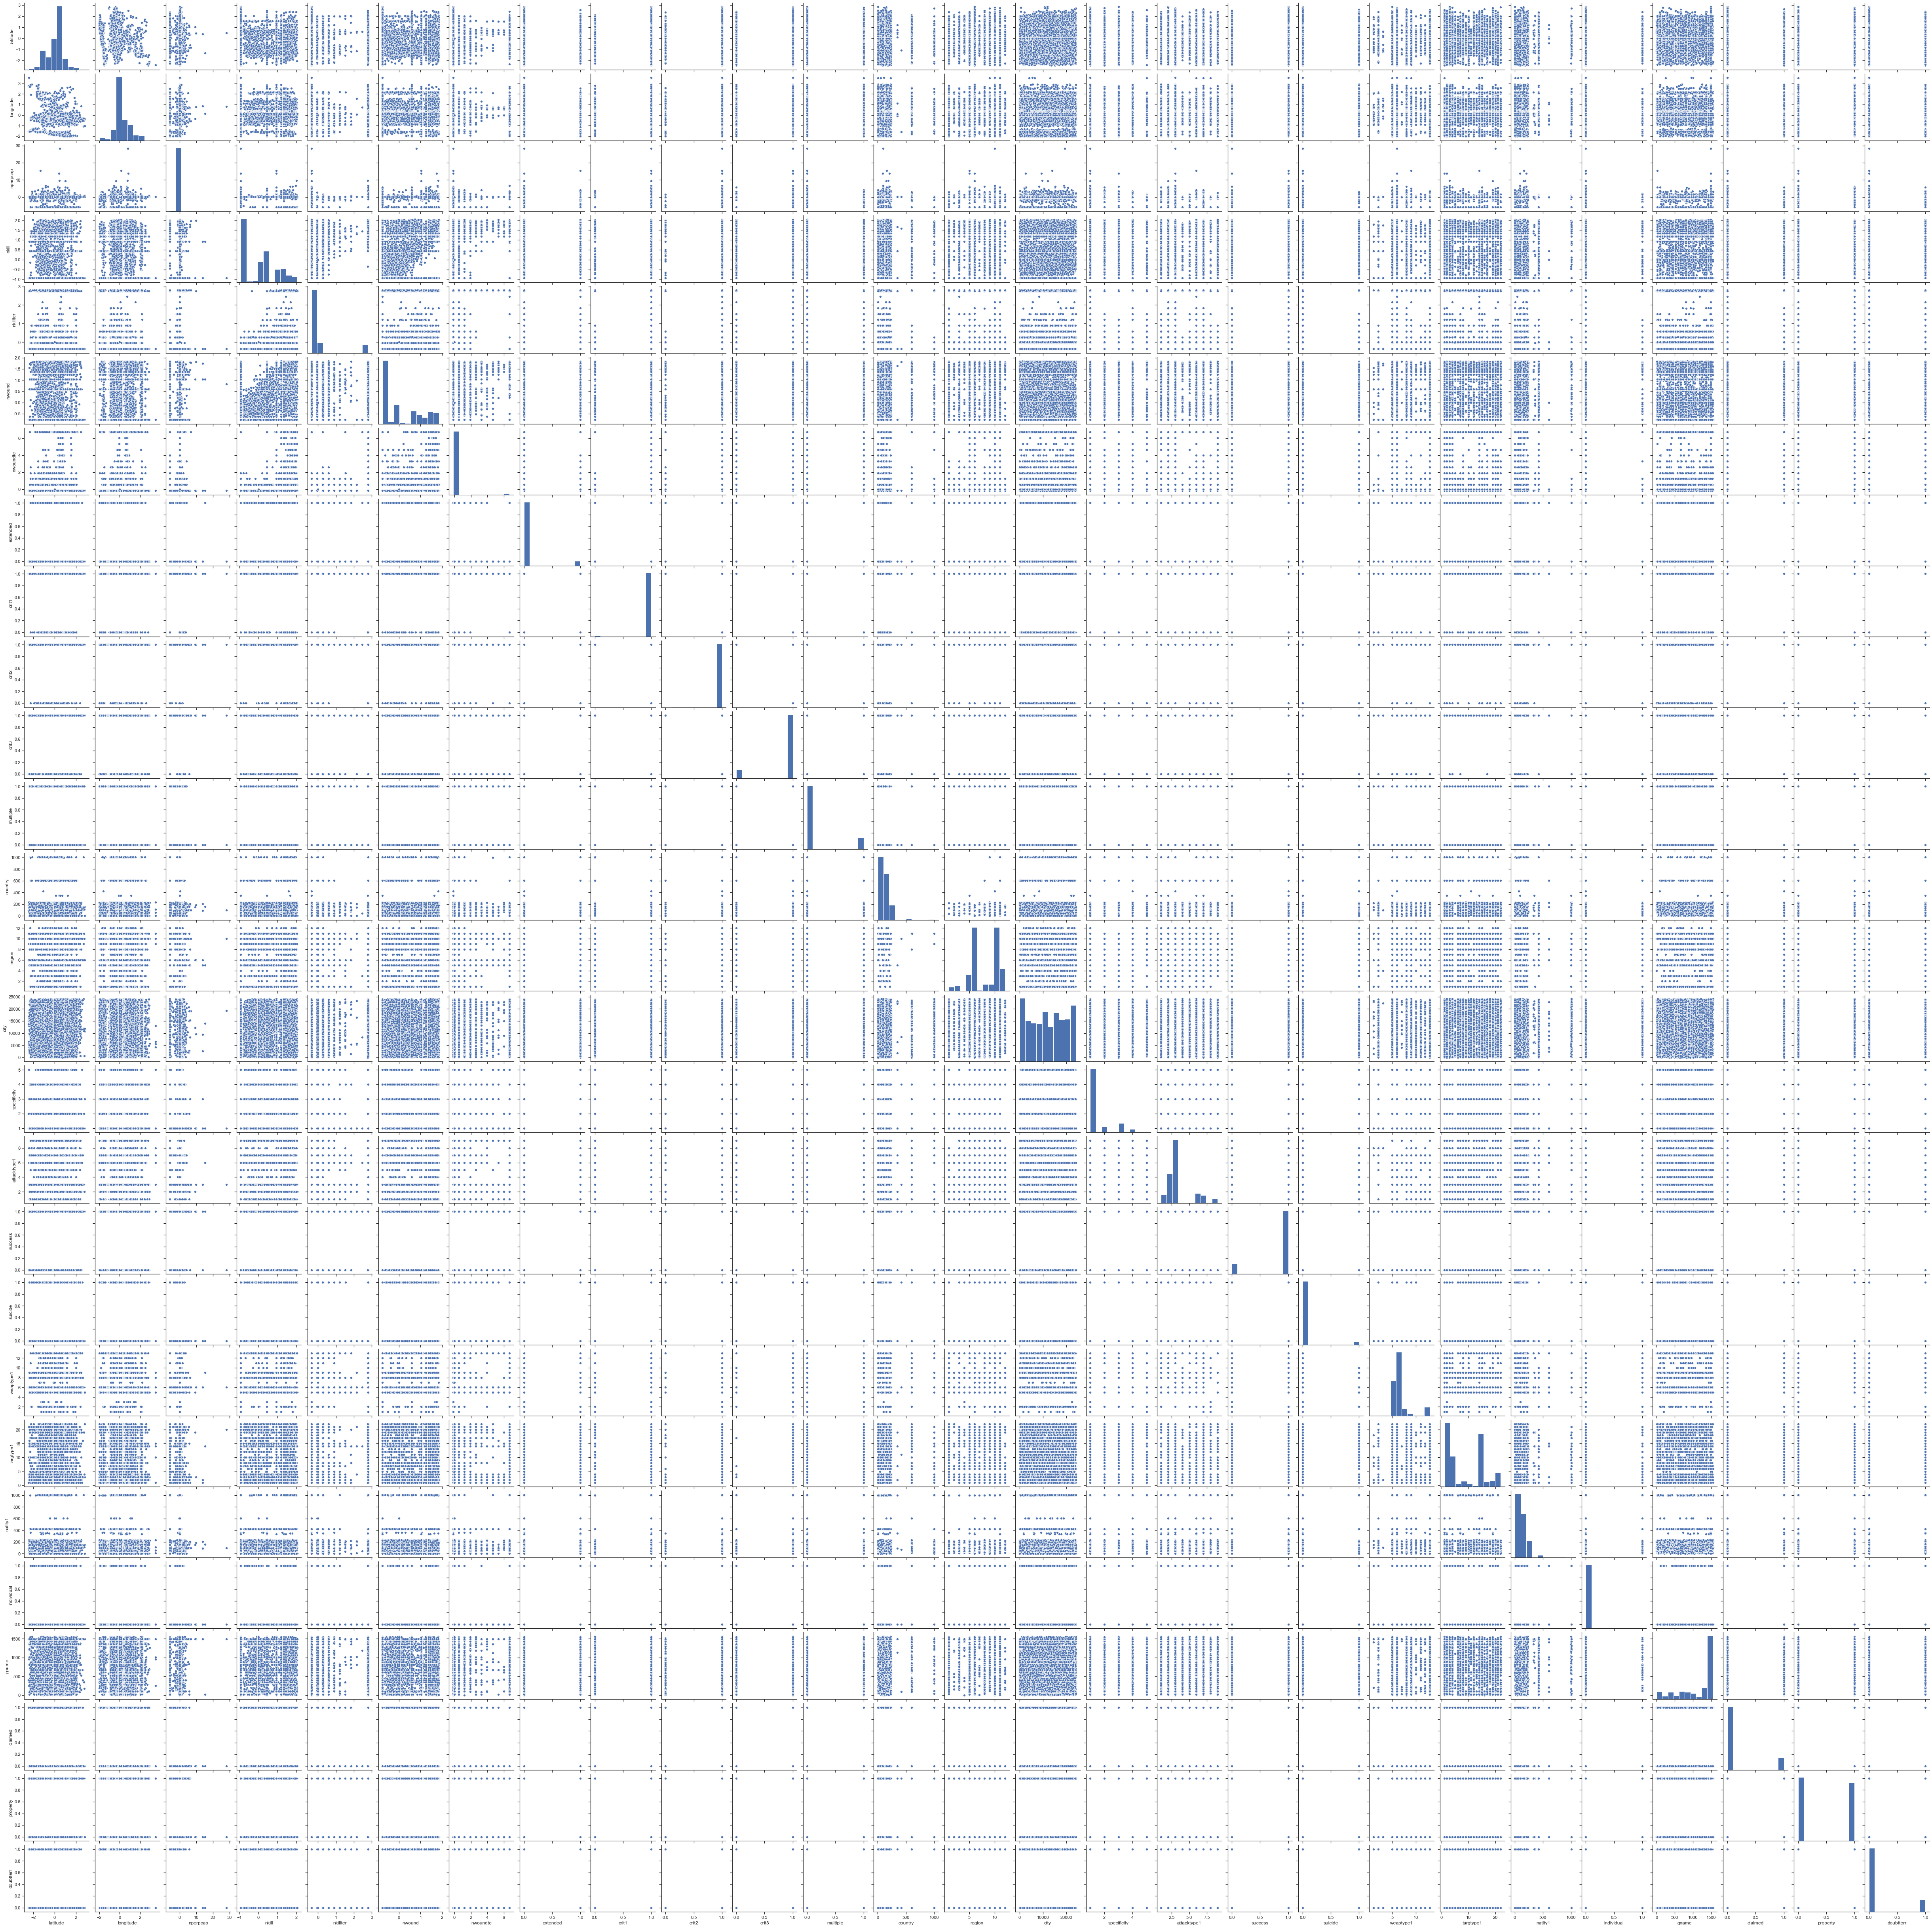

In [31]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df1)

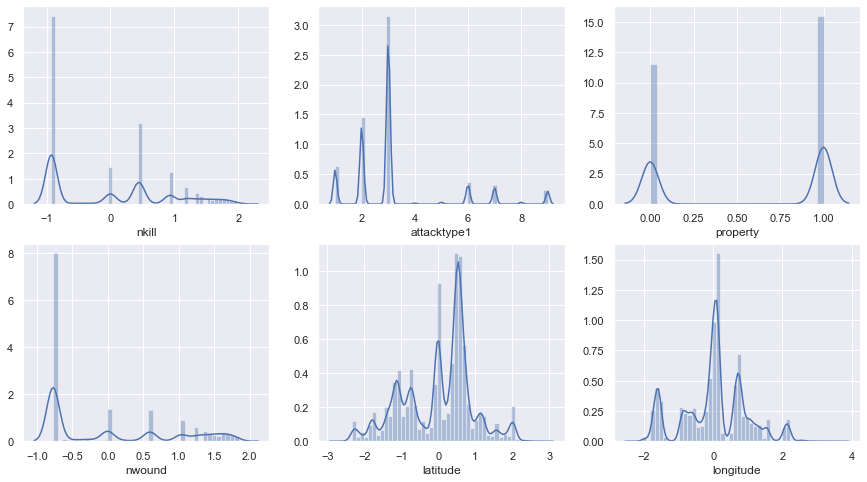

In [22]:
sns.set(style="darkgrid")
fig,ax=plt.subplots(2,3,figsize=(15,8))
sns.distplot(df['nkill'],ax=ax[0,0])
sns.distplot(df['attacktype1'],ax=ax[0,1])
sns.distplot(df['property'],ax=ax[0,2])
sns.distplot(df['nwound'],ax=ax[1,0])
sns.distplot(df['latitude'],ax=ax[1,1])
sns.distplot(df['longitude'],ax=ax[1,2])
plt.show()

IndexError: index 12 is out of bounds for axis 0 with size 12

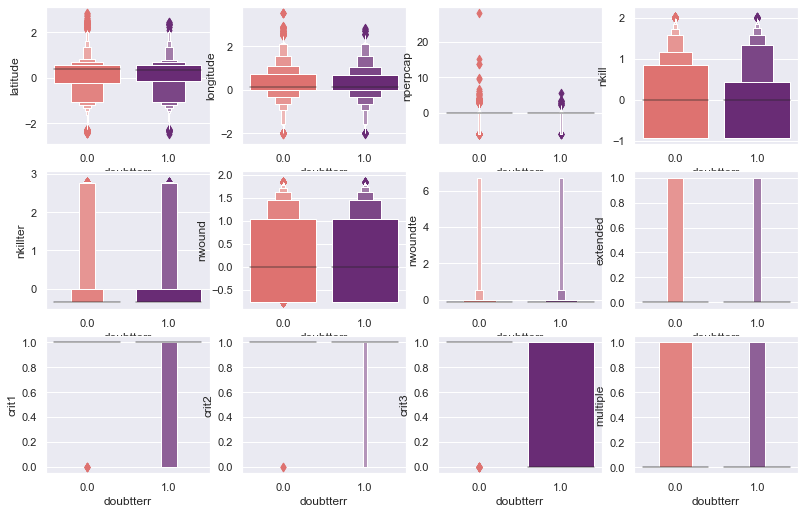

In [101]:
fig, axes = plt.subplots(3, 4, figsize = (12,8))
axes = axes.flatten()

for i in range(0,len(df1.columns)-1):
    sns.boxenplot(x="doubtterr", y=df1.iloc[:,i], data=df1, orient='v', ax=axes[i],palette="magma_r")

plt.tight_layout()
plt.show()

In [82]:
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
col = "doubtterr"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
colors = ['yellow', 'purplr']
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0],marker=dict(colors=colors, line=dict(color='#000000', width=2)))
layout = {'title': 'Terrorism (1:Other forms of Crime, 0: Confirmed Terrorist activity)'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

0.0    82.727836
1.0    17.272164
Name: doubtterr, dtype: float64

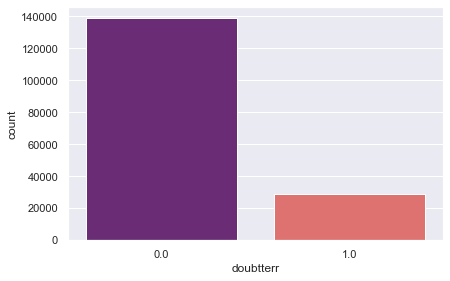

In [97]:
plt.subplots(figsize=(6,4))
sns.countplot(df['doubtterr'],palette='magma')
df['doubtterr'].value_counts(normalize=True)*100

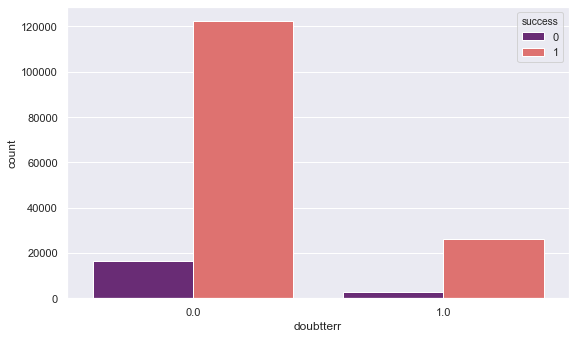

In [102]:
plt.subplots(figsize=(8,5))
sns.countplot(df['doubtterr'],palette='magma',hue=df['success'])

In [36]:
print('Country with Highest Terrorist Attacks:',df['country_txt'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['region_txt'].value_counts().index[0])
print('Maximum people killed in an attack are:',df['nkill'].max(),'that took place in',df.loc[df['nkill'].idxmax()].country_txt)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 2.0360425785330007 that took place in Philippines


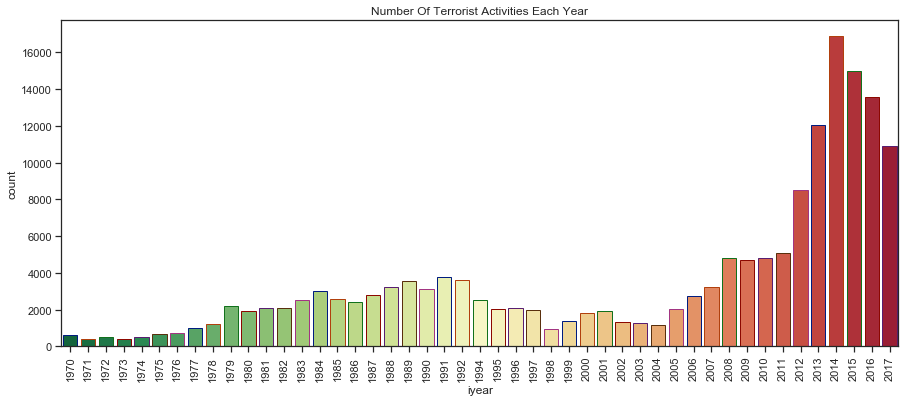

In [37]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

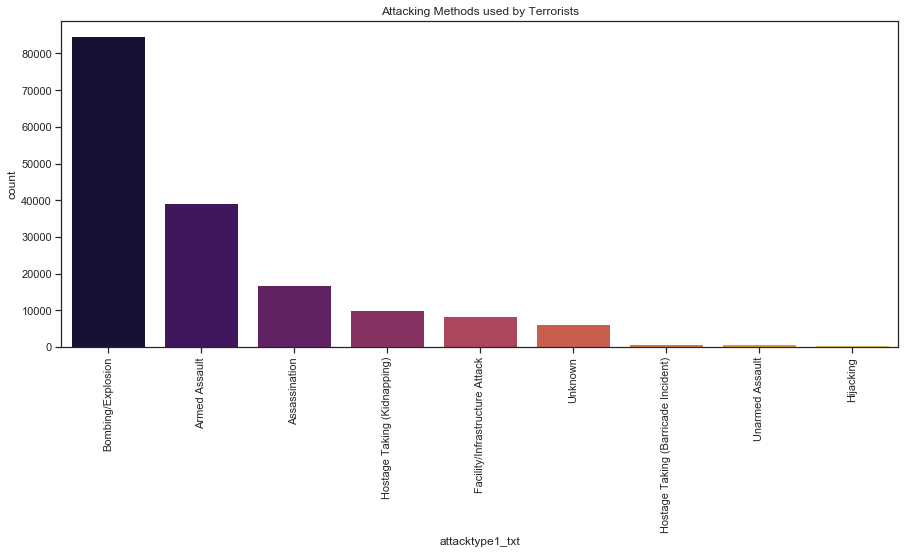

In [40]:
plt.subplots(figsize=(15,6))
sns.countplot('attacktype1_txt',data=df,palette='inferno',order=df['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods used by Terrorists')
plt.show()

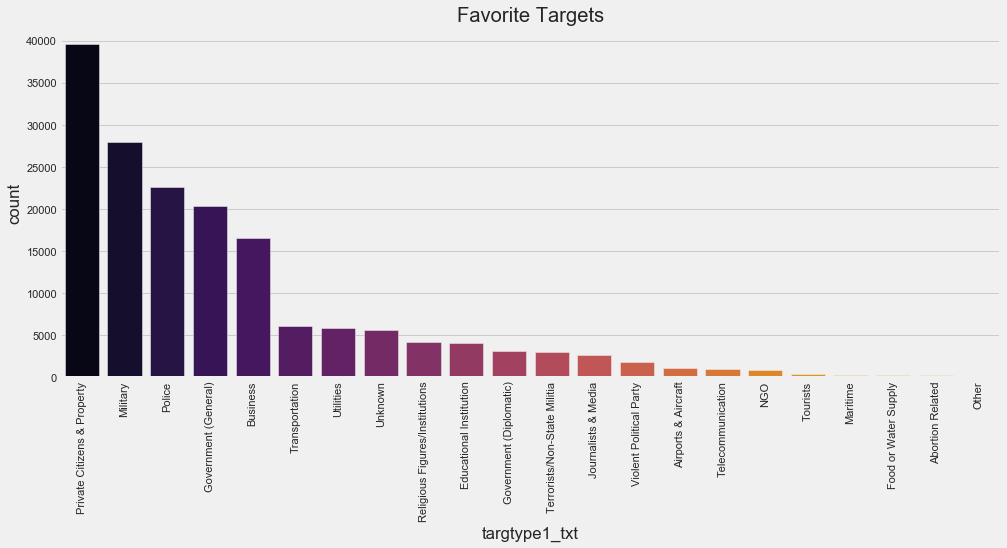

In [48]:
plt.subplots(figsize=(15,6))
sns.countplot(df['targtype1_txt'],palette='inferno',order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

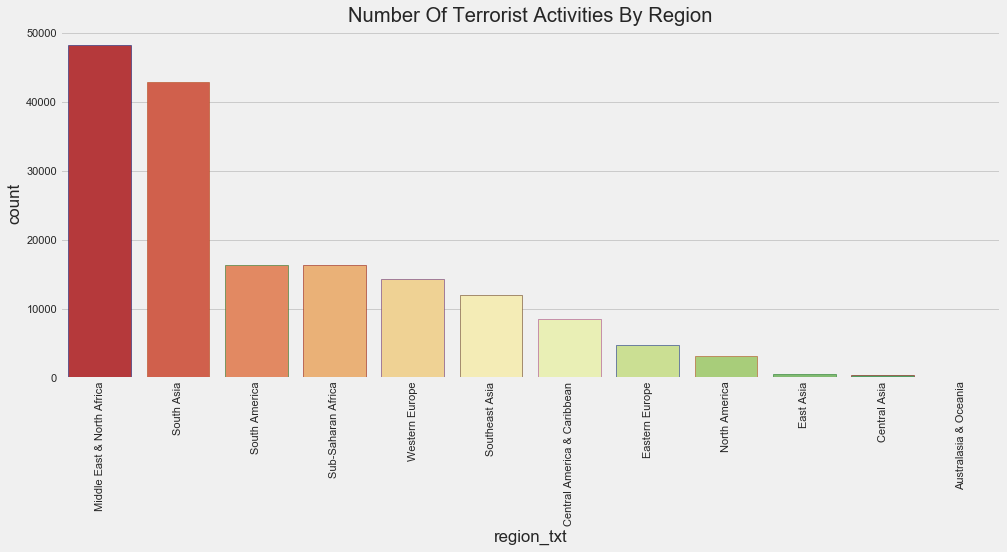

In [51]:
plt.subplots(figsize=(15,6))
sns.countplot('region_txt',data=df,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=df['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

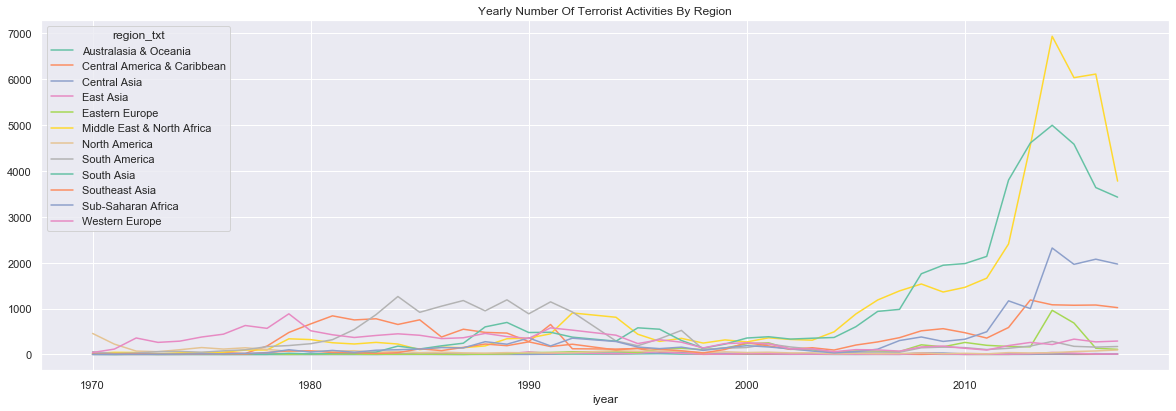

In [103]:
terror_region=pd.crosstab(df.iyear,df.region_txt)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Yearly Number Of Terrorist Activities By Region')
plt.show()

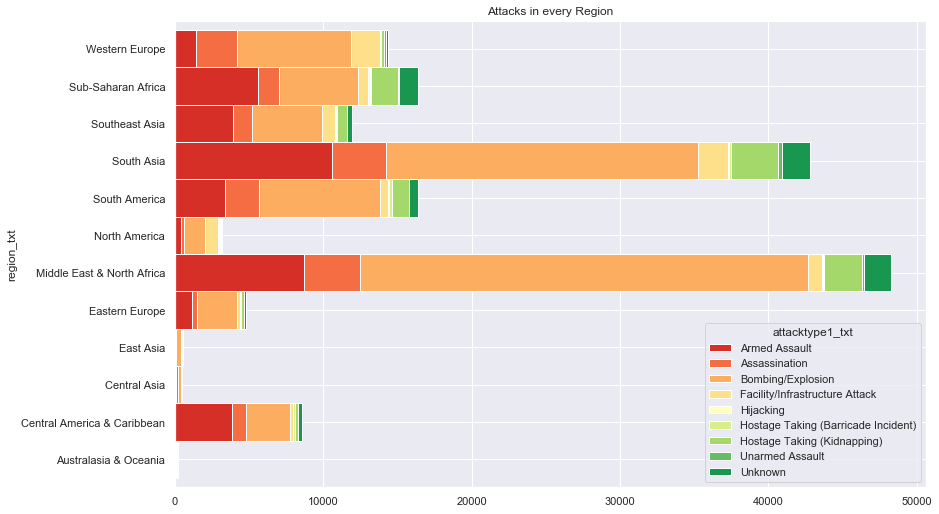

In [104]:
pd.crosstab(df.region_txt,df.attacktype1_txt).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.title('Attacks in every Region')
plt.show()

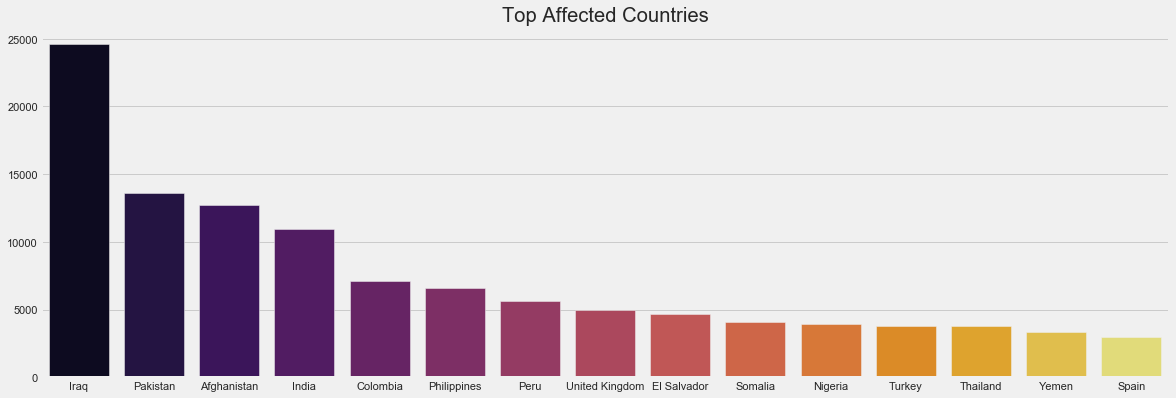

In [56]:
plt.subplots(figsize=(18,6))
sns.barplot(df['country_txt'].value_counts()[:15].index,df['country_txt'].value_counts()[:15].values,palette='inferno')
plt.title('Top Affected Countries')
plt.show()

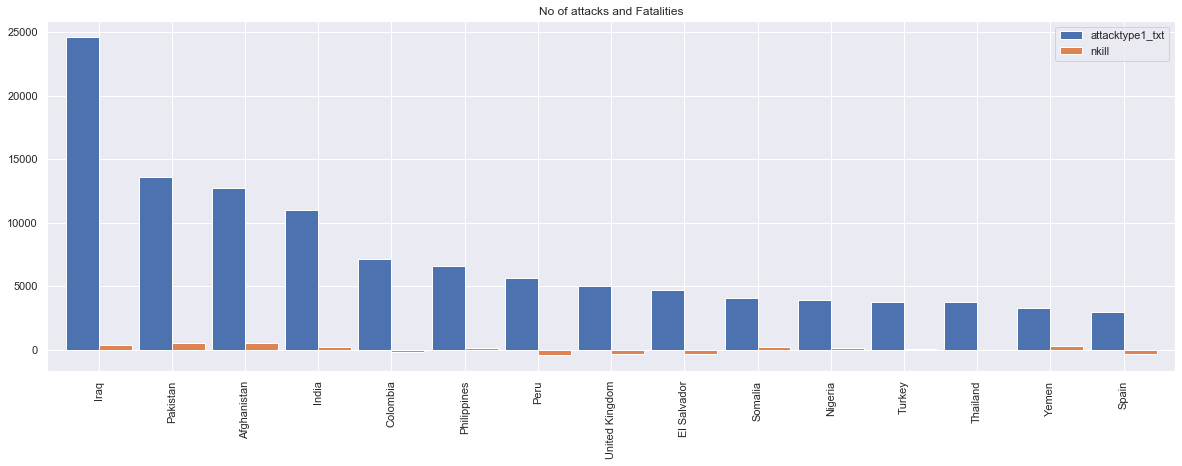

In [105]:
coun_terror=df['country_txt'].value_counts()[:15].to_frame()
coun_terror.columns=['attacktype1_txt']
coun_kill=df.groupby('country_txt')['nkill'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('No of attacks and Fatalities')

plt.show()

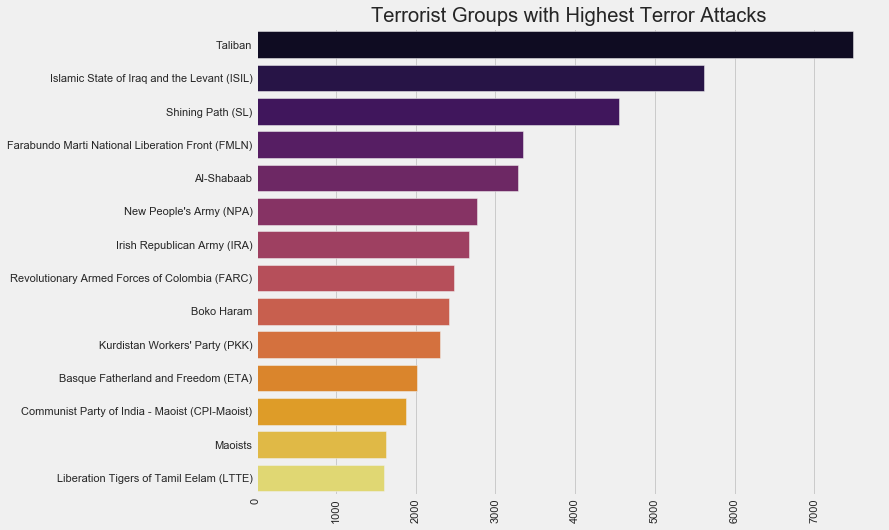

In [62]:
sns.barplot(df['gname'].value_counts()[1:15].values,df['gname'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

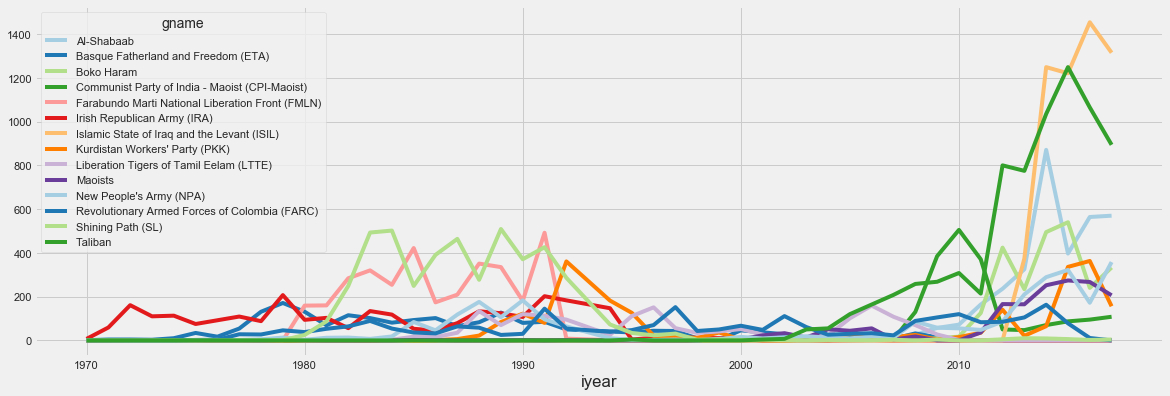

In [65]:
top_groups15=df[df['gname'].isin(df['gname'].value_counts()[1:15].index)]
pd.crosstab(top_groups15.iyear,top_groups15.gname).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [13]:
df.columns

Index(['Unnamed: 0', 'latitude', 'longitude', 'nperpcap', 'nkill', 'nkillter',
       'nwound', 'nwoundte', 'eventid', 'iyear', 'imonth', 'iday', 'extended',
       'crit1', 'crit2', 'crit3', 'multiple', 'country', 'country_txt',
       'region', 'region_txt', 'city', 'specificity', 'attacktype1',
       'attacktype1_txt', 'success', 'suicide', 'weaptype1', 'weaptype1_txt',
       'targtype1', 'targtype1_txt', 'natlty1', 'natlty1_txt', 'individual',
       'gname', 'claimed', 'property', 'doubtterr'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167906 entries, 0 to 167905
Data columns (total 38 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       167906 non-null  int64  
 1   latitude         167906 non-null  float64
 2   longitude        167906 non-null  float64
 3   nperpcap         167906 non-null  float64
 4   nkill            167906 non-null  float64
 5   nkillter         167906 non-null  float64
 6   nwound           167906 non-null  float64
 7   nwoundte         167906 non-null  float64
 8   eventid          167906 non-null  int64  
 9   iyear            167906 non-null  int64  
 10  imonth           167906 non-null  int64  
 11  iday             167156 non-null  float64
 12  extended         167906 non-null  int64  
 13  crit1            167906 non-null  int64  
 14  crit2            167906 non-null  int64  
 15  crit3            167906 non-null  int64  
 16  multiple         167905 non-null  floa

# Model building without null values

In [6]:
df.head()

Unnamed: 0  latitude  longitude  nperpcap     nkill  nkillter    nwound  \
0           0 -0.444783  -1.540087  0.074550  0.444343 -0.360005 -0.770908   
1           1 -0.388388  -1.798341  0.074550 -0.924496 -0.360005 -0.770908   
2           2 -0.625239   2.054074 -0.698187  0.444343  0.577422 -0.770908   
3           3  0.833952  -0.353311  1.800576 -0.924496 -0.047530 -0.770908   
4           5 -2.298085  -1.413866  0.074550 -0.924496 -0.360005 -0.770908   

   nwoundte       eventid  iyear  ...  weaptype1_txt  targtype1  \
0 -0.149083  197000000001   1970  ...        Unknown         14   
1 -0.149083  197000000002   1970  ...        Unknown          7   
2 -0.149083  197001000001   1970  ...        Unknown         10   
3 -0.149083  197001000002   1970  ...     Explosives          7   
4 -0.149083  197001010002   1970  ...       Firearms          3   

                 targtype1_txt  natlty1         natlty1_txt  individual  \
0  Private Citizens & Property     58.0  Dominican Republic           0   
1      Government (Diplomatic)     21.0             Belgium           0   
2          Journalists & Media    217.0       United States           0   
3      Government (Diplomatic)    217.0       United States           0   
4                       Police    217.0       United States           0   

                                gname  claimed property  doubtterr  
0                              MANO-D      NaN      0.0        0.0  
1  23rd of September Communist League      NaN      0.0        0.0  
2                             Unknown      NaN      0.0        0.0  
3                             Unknown      NaN      1.0        0.0  
4                  Black Nationalists      0.0      1.0        0.0  

[5 rows x 38 columns]

In [7]:
df.shape

(167906, 38)

size of the dataset before dropping null values

In [23]:
df1=df.dropna(axis=0)

In [24]:
df1.shape

(91686, 38)

size of the dataset after dropping null values

In [25]:
df1.isnull().sum()

Unnamed: 0         0
latitude           0
longitude          0
nperpcap           0
nkill              0
nkillter           0
nwound             0
nwoundte           0
eventid            0
iyear              0
imonth             0
iday               0
extended           0
crit1              0
crit2              0
crit3              0
multiple           0
country            0
country_txt        0
region             0
region_txt         0
city               0
specificity        0
attacktype1        0
attacktype1_txt    0
success            0
suicide            0
weaptype1          0
weaptype1_txt      0
targtype1          0
targtype1_txt      0
natlty1            0
natlty1_txt        0
individual         0
gname              0
claimed            0
property           0
doubtterr          0
dtype: int64

In [26]:
for i in df1.columns:
    print(i,'-',df1[i].nunique())

Unnamed: 0 - 91686
latitude - 29716
longitude - 29414
nperpcap - 148
nkill - 1828
nkillter - 289
nwound - 2698
nwoundte - 59
eventid - 91686
iyear - 47
imonth - 12
iday - 31
extended - 2
crit1 - 2
crit2 - 2
crit3 - 2
multiple - 2
country - 168
country_txt - 168
region - 12
region_txt - 12
city - 24133
specificity - 5
attacktype1 - 9
attacktype1_txt - 9
success - 2
suicide - 2
weaptype1 - 12
weaptype1_txt - 12
targtype1 - 22
targtype1_txt - 22
natlty1 - 186
natlty1_txt - 186
individual - 2
gname - 1557
claimed - 2
property - 2
doubtterr - 2


In [27]:
df1=df1.drop(['Unnamed: 0','eventid','iyear','imonth','iday','country_txt','region_txt','attacktype1_txt','weaptype1_txt','targtype1_txt','natlty1_txt'],axis=1)

Dropped few columns that are not necessary for model building.

In [28]:
df1.head()

latitude  longitude  nperpcap     nkill  nkillter    nwound  nwoundte  \
4  -2.298085  -1.413866  0.074550 -0.924496 -0.360005 -0.770908 -0.149083   
6   1.186852  -1.713734  0.212670 -0.924496 -0.360005 -0.770908 -0.149083   
7   1.186596  -1.713507  0.212670 -0.924496 -0.360005 -0.770908 -0.149083   
8   1.214369  -1.716653 -2.436532 -0.924496 -0.360005 -0.770908 -0.149083   
10  1.134659  -1.657487 -5.837894 -0.924496 -0.360005 -0.770908 -0.149083   

    extended  crit1  crit2  ...  success  suicide  weaptype1  targtype1  \
4          0      1      1  ...        1        0          5          3   
6          0      1      1  ...        1        0          6         21   
7          0      1      1  ...        1        0          8          4   
8          0      1      1  ...        1        0          8          2   
10         0      1      1  ...        1        0          8          4   

   natlty1  individual                gname  claimed  property  doubtterr  
4    217.0           0   Black Nationalists      0.0       1.0        0.0  
6    217.0           0              Unknown      0.0       1.0        1.0  
7    217.0           0      New Year's Gang      1.0       1.0        0.0  
8    217.0           0      New Year's Gang      0.0       1.0        0.0  
10   217.0           0  Left-Wing Militants      0.0       1.0        1.0  

[5 rows x 27 columns]

Labelencoding the 'city' and 'gname' variables

In [29]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df1['city']= label_encoder.fit_transform(df1['city'])
df1['gname']= label_encoder.fit_transform(df1['gname'])


Dataset after encoding.

In [15]:
pd.set_option('max_columns', None)

In [16]:
df1.head()

latitude  longitude  nperpcap     nkill  nkillter    nwound  nwoundte  \
4  -2.298085  -1.413866  0.074550 -0.924496 -0.360005 -0.770908 -0.149083   
6   1.186852  -1.713734  0.212670 -0.924496 -0.360005 -0.770908 -0.149083   
7   1.186596  -1.713507  0.212670 -0.924496 -0.360005 -0.770908 -0.149083   
8   1.214369  -1.716653 -2.436532 -0.924496 -0.360005 -0.770908 -0.149083   
10  1.134659  -1.657487 -5.837894 -0.924496 -0.360005 -0.770908 -0.149083   

    extended  crit1  crit2  crit3  multiple  country  region   city  \
4          0      1      1      1       0.0      217       1   4438   
6          0      1      1      1       0.0      217       1  16594   
7          0      1      1      1       0.0      217       1  13556   
8          0      1      1      1       0.0      217       1  13556   
10         0      1      1      1       0.0      217       1   6095   

    specificity  attacktype1  success  suicide  weaptype1  targtype1  natlty1  \
4           1.0            2        1        0          5          3    217.0   
6           1.0            3        1        0          6         21    217.0   
7           1.0            7        1        0          8          4    217.0   
8           1.0            7        1        0          8          2    217.0   
10          1.0            7        1        0          8          4    217.0   

    individual  gname  claimed  property  doubtterr  
4            0    336      0.0       1.0        0.0  
6            0   1498      0.0       1.0        1.0  
7            0   1016      1.0       1.0        0.0  
8            0   1016      0.0       1.0        0.0  
10           0    819      0.0       1.0        1.0

# Train test split

In [17]:
X=df1.drop('doubtterr',axis=1)
y=df1['doubtterr']

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=2)

LOGISTIC REGRESSION

In [295]:
from sklearn.linear_model import LogisticRegression
lgreg2=LogisticRegression().fit(X_train,y_train)

In [296]:
y_predf=lgreg2.predict(X_test)

In [297]:
import sklearn
sklearn.metrics.accuracy_score(y_test,y_predf)

0.9741510943066968

In [298]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
# print classification report 
print(classification_report(y_test,y_predf)) 

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     23103
         1.0       1.00      0.84      0.91      4403

    accuracy                           0.97     27506
   macro avg       0.98      0.92      0.95     27506
weighted avg       0.97      0.97      0.97     27506



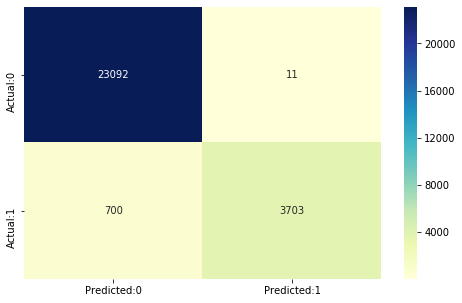

In [299]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predf)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [187]:
# K Fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [188]:
# Cross validation score

name='Logistic Regression'
kfold = KFold(shuffle=True,n_splits=5,random_state=1)
cv_results = cross_val_score(lgreg2, X_train,y_train,cv=kfold, scoring='f1_weighted')
print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))

print('cross validation scores: ',cv_results)
# Bias error
print('Bias error: ',np.mean((1-cv_results)*100))

# Variance error
print('variance error: ',np.var((1-cv_results)*100,ddof=1))

Logistic Regression: 0.972466 (0.000000)
cross validation scores:  [0.97230919 0.97288264 0.97216312 0.97324299 0.97173227]
Bias error:  2.753395913866148
variance error:  0.003579947017324463


DECISION TREE

In [189]:
from sklearn.tree import DecisionTreeClassifier

In [190]:
clf1 = DecisionTreeClassifier(criterion='entropy').fit(X_train,y_train)

In [191]:
y_predd=clf1.predict(X_test)

In [192]:
sklearn.metrics.accuracy_score(y_test,y_predd)

0.9529193630480622

In [193]:
# print classification report 
print(classification_report(y_test,y_predd)) 

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97     23184
         1.0       0.84      0.87      0.85      4322

    accuracy                           0.95     27506
   macro avg       0.91      0.92      0.91     27506
weighted avg       0.95      0.95      0.95     27506



In [194]:
# Cross validation score

name='Decision Tree'
kfold = KFold(shuffle=True,n_splits=5,random_state=1)
cv_results = cross_val_score(clf1, X_train,y_train,cv=kfold, scoring='f1_weighted')
print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))

print('cross validation scores: ',cv_results)
# Bias error
print('Bias error: ',np.mean((1-cv_results)*100))

# Variance error
print('variance error: ',np.var((1-cv_results)*100,ddof=1))

Decision Tree: 0.952994 (0.000001)
cross validation scores:  [0.95378449 0.9534886  0.95160177 0.95352112 0.95257613]
Bias error:  4.700557663818336
variance error:  0.008150737709596395


RANDOM FOREST

In [195]:
from sklearn.ensemble import RandomForestClassifier

In [196]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
y_predrf = rf.predict(X_test)


In [197]:
sklearn.metrics.accuracy_score(y_test,y_predrf)

0.9746237184614266

In [198]:
# print classification report 
print(classification_report(y_test,y_predrf)) 

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     23184
         1.0       1.00      0.84      0.91      4322

    accuracy                           0.97     27506
   macro avg       0.98      0.92      0.95     27506
weighted avg       0.98      0.97      0.97     27506



In [199]:
# Cross validation score

name='Random Forest'
kfold = KFold(shuffle=True,n_splits=5,random_state=1)
cv_results = cross_val_score(rf, X_train,y_train,cv=kfold, scoring='f1_weighted')
print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))

print('cross validation scores: ',cv_results)
# Bias error
print('Bias error: ',np.mean((1-cv_results)*100))

# Variance error
print('variance error: ',np.var((1-cv_results)*100,ddof=1))

Random Forest: 0.972918 (0.000001)
cross validation scores:  [0.97259889 0.97356517 0.97261223 0.97385162 0.97196444]
Bias error:  2.7081532325533697
variance error:  0.0059876861274645535


KNN

In [200]:
from sklearn.neighbors import KNeighborsClassifier

In [201]:
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [202]:
ypredk=knn.predict(X_test)

In [203]:
sklearn.metrics.accuracy_score(y_test,ypredk)

0.9712426379698975

In [204]:
# Cross validation score

name='KNN'
kfold = KFold(shuffle=True,n_splits=5,random_state=1)
cv_results = cross_val_score(knn, X_train,y_train,cv=kfold, scoring='f1_weighted')
print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))

print('cross validation scores: ',cv_results)
# Bias error
print('Bias error: ',np.mean((1-cv_results)*100))

# Variance error
print('variance error: ',np.var((1-cv_results)*100,ddof=1))

KNN: 0.969682 (0.000001)
cross validation scores:  [0.96940304 0.96991207 0.96863835 0.97082175 0.96963689]
Bias error:  3.0317579995553907
variance error:  0.006302538857935343


In [ ]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy',fontsize=20)
plt.xlabel('Number of Neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(neig)
plt.grid()
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

NAIVE BAYES CLASSIFICATION

In [205]:
from sklearn.naive_bayes import GaussianNB

In [206]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [207]:
y_predg=gnb.predict(X_test)

In [208]:
sklearn.metrics.accuracy_score(y_test,y_predg)

0.9673162219152185

In [209]:
# print classification report 
print(classification_report(y_test,y_predg)) 

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     23184
         1.0       0.94      0.84      0.89      4322

    accuracy                           0.97     27506
   macro avg       0.96      0.92      0.94     27506
weighted avg       0.97      0.97      0.97     27506



In [210]:
# Cross validation score

name='Naive Bayes'
kfold = KFold(shuffle=True,n_splits=5,random_state=1)
cv_results = cross_val_score(gnb, X_train,y_train,cv=kfold, scoring='f1_weighted')
print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))

print('cross validation scores: ',cv_results)
# Bias error
print('Bias error: ',np.mean((1-cv_results)*100))

# Variance error
print('variance error: ',np.var((1-cv_results)*100,ddof=1))

Naive Bayes: 0.966866 (0.000001)
cross validation scores:  [0.96647    0.96852579 0.9667867  0.96617993 0.96636595]
Bias error:  3.3134328136990554
variance error:  0.009096840513441541


# Model building on unscaled data

In [211]:
Xn=df1.drop('doubtterr',axis=1)
yn=df1['doubtterr']

In [212]:
Xn_train,Xn_test,yn_train,yn_test=train_test_split(Xn,yn, test_size=0.3, random_state=2)

LOGISTIC REGRESSION

In [213]:
from sklearn.linear_model import LogisticRegression
lgreg3=LogisticRegression().fit(Xn_train,yn_train)

In [214]:
y_predlrn=lgreg3.predict(Xn_test)
sklearn.metrics.accuracy_score(yn_test,y_predlrn)

0.8475605322475096

In [215]:
# print classification report 
print(classification_report(y_test,y_predf)) 

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85     23184
         1.0       0.15      0.13      0.14      4322

    accuracy                           0.75     27506
   macro avg       0.50      0.50      0.50     27506
weighted avg       0.73      0.75      0.74     27506



In [216]:
# Cross validation score

name='Logistic Regression'
kfold = KFold(shuffle=True,n_splits=5,random_state=1)
cv_results = cross_val_score(lgreg3,Xn_train,yn_train,cv=kfold, scoring='f1_weighted')
print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))

print('cross validation scores: ',cv_results)
# Bias error
print('Bias error: ',np.mean((1-cv_results)*100))

# Variance error
print('variance error: ',np.var((1-cv_results)*100,ddof=1))

Logistic Regression: 0.839340 (0.000447)
cross validation scores:  [0.81465729 0.82416302 0.84704878 0.84179779 0.86903328]
Bias error:  16.065996795263125
variance error:  4.466834951634697


DECISION TREE

In [217]:
from sklearn.tree import DecisionTreeClassifier

In [218]:
 clf2 = DecisionTreeClassifier(criterion='entropy').fit(Xn_train,yn_train)

In [219]:
y_preddn=clf2.predict(Xn_test)

In [220]:
sklearn.metrics.accuracy_score(yn_test,y_preddn)

0.9547371482585618

In [221]:
# print classification report 
print(classification_report(yn_test,y_preddn)) 

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97     23103
         1.0       0.85      0.87      0.86      4403

    accuracy                           0.95     27506
   macro avg       0.91      0.92      0.92     27506
weighted avg       0.96      0.95      0.95     27506



In [222]:
# Cross validation score

name='Decision Tree'
kfold = KFold(shuffle=True,n_splits=5,random_state=1)
cv_results = cross_val_score(clf2, Xn_train,yn_train,cv=kfold, scoring='f1_weighted')
print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))

print('cross validation scores: ',cv_results)
# Bias error
print('Bias error: ',np.mean((1-cv_results)*100))

# Variance error
print('variance error: ',np.var((1-cv_results)*100,ddof=1))

Decision Tree: 0.952050 (0.000002)
cross validation scores:  [0.95103279 0.95254007 0.95038394 0.95297378 0.95331998]
Bias error:  4.794988669204498
variance error:  0.01629210683022408


RANDOM FOREST

In [223]:
from sklearn.ensemble import RandomForestClassifier

In [224]:
rfn = RandomForestClassifier(n_estimators = 100)
rfn.fit(Xn_train, yn_train)
y_predrfn = rf.predict(Xn_test)


In [225]:
sklearn.metrics.accuracy_score(yn_test,y_predrfn)

0.8399258343634116

In [226]:
# print classification report 
print(classification_report(yn_test,y_predrfn)) 

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     23103
         1.0       0.00      0.00      0.00      4403

    accuracy                           0.84     27506
   macro avg       0.42      0.50      0.46     27506
weighted avg       0.71      0.84      0.77     27506



In [227]:
# Cross validation score

name='Randome Forest'
kfold = KFold(shuffle=True,n_splits=5,random_state=1)
cv_results = cross_val_score(rfn, Xn_train,yn_train,cv=kfold, scoring='f1_weighted')
print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))

print('cross validation scores: ',cv_results)
# Bias error
print('Bias error: ',np.mean((1-cv_results)*100))

# Variance error
print('variance error: ',np.var((1-cv_results)*100,ddof=1))

Randome Forest: 0.972995 (0.000001)
cross validation scores:  [0.97227707 0.97282395 0.97393023 0.9715648  0.97437725]
Bias error:  2.700534139632231
variance error:  0.01343854658120796


NAIVE BAYES CLASSIFICATION

In [228]:
from sklearn.naive_bayes import GaussianNB

In [229]:
gnbn = GaussianNB()
gnbn.fit(Xn_train,yn_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [230]:
y_predgn=gnbn.predict(Xn_test)

In [231]:
sklearn.metrics.accuracy_score(yn_test,y_predgn)

0.957536537482731

In [232]:
# print classification report 
print(classification_report(yn_test,y_predgn)) 

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     23103
         1.0       0.93      0.79      0.86      4403

    accuracy                           0.96     27506
   macro avg       0.95      0.89      0.92     27506
weighted avg       0.96      0.96      0.96     27506



In [233]:
name='Naive bayes'
kfold = KFold(shuffle=True,n_splits=5,random_state=1)
cv_results = cross_val_score(gnbn, Xn_train,yn_train,cv=kfold, scoring='f1_weighted')
print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))

print('cross validation scores: ',cv_results)
# Bias error
print('Bias error: ',np.mean((1-cv_results)*100))

# Variance error
print('variance error: ',np.var((1-cv_results)*100,ddof=1))

Naive bayes: 0.953808 (0.000010)
cross validation scores:  [0.95219253 0.9518388  0.95687222 0.95048565 0.95764925]
Bias error:  4.619231051422441
variance error:  0.10417535036447967


KNN

In [234]:
from sklearn.neighbors import KNeighborsClassifier

In [235]:
knnn = KNeighborsClassifier(n_neighbors=3) 
knnn.fit(Xn_train, yn_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [236]:
ypredkn=knnn.predict(Xn_test)

In [237]:
sklearn.metrics.accuracy_score(yn_test,ypredkn)

0.8458881698538501

In [238]:
name='KNN'
kfold = KFold(shuffle=True,n_splits=5,random_state=1)
cv_results = cross_val_score(knnn, Xn_train,yn_train,cv=kfold, scoring='f1_weighted')
print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))

print('cross validation scores: ',cv_results)
# Bias error
print('Bias error: ',np.mean((1-cv_results)*100))

# Variance error
print('variance error: ',np.var((1-cv_results)*100,ddof=1))

KNN: 0.833394 (0.000032)
cross validation scores:  [0.83074954 0.83300635 0.82660464 0.83479221 0.8418177 ]
Bias error:  16.660591045742002
variance error:  0.3153815243021222


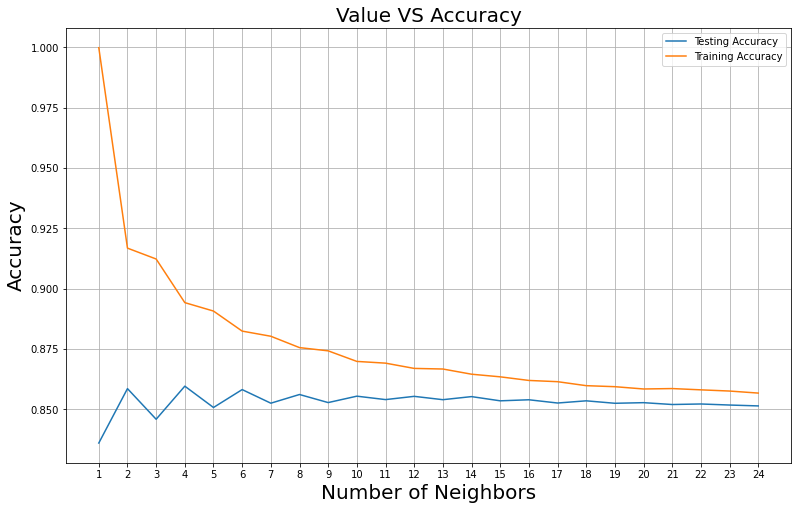

Best accuracy is 0.8595942703410165 with K = 4


In [356]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knnn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knnn.fit(Xn_train,yn_train)
    #train accuracy
    train_accuracy.append(knnn.score(Xn_train, yn_train))
    # test accuracy
    test_accuracy.append(knnn.score(Xn_test, yn_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy',fontsize=20)
plt.xlabel('Number of Neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(neig)
plt.grid()
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [41]:
df1.head()

latitude  longitude  nperpcap     nkill  nkillter    nwound  nwoundte  \
4  -2.298085  -1.413866  0.074550 -0.924496 -0.360005 -0.770908 -0.149083   
6   1.186852  -1.713734  0.212670 -0.924496 -0.360005 -0.770908 -0.149083   
7   1.186596  -1.713507  0.212670 -0.924496 -0.360005 -0.770908 -0.149083   
8   1.214369  -1.716653 -2.436532 -0.924496 -0.360005 -0.770908 -0.149083   
10  1.134659  -1.657487 -5.837894 -0.924496 -0.360005 -0.770908 -0.149083   

    extended  crit1  crit2  crit3  multiple  country  region   city  \
4          0      1      1      1       0.0      217       1   4438   
6          0      1      1      1       0.0      217       1  16594   
7          0      1      1      1       0.0      217       1  13556   
8          0      1      1      1       0.0      217       1  13556   
10         0      1      1      1       0.0      217       1   6095   

    specificity  attacktype1  success  suicide  weaptype1  targtype1  natlty1  \
4           1.0            2        1        0          5          3    217.0   
6           1.0            3        1        0          6         21    217.0   
7           1.0            7        1        0          8          4    217.0   
8           1.0            7        1        0          8          2    217.0   
10          1.0            7        1        0          8          4    217.0   

    individual  gname  claimed  property  doubtterr  
4            0    336      0.0       1.0        0.0  
6            0   1498      0.0       1.0        1.0  
7            0   1016      1.0       1.0        0.0  
8            0   1016      0.0       1.0        0.0  
10           0    819      0.0       1.0        1.0

In [42]:
df1.shape

(91686, 27)

### Logit Model

In [31]:
import statsmodels.api as sm
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [43]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df1)
df_constant.head()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const  latitude  longitude  nperpcap     nkill  nkillter    nwound  \
4     1.0 -2.298085  -1.413866  0.074550 -0.924496 -0.360005 -0.770908   
6     1.0  1.186852  -1.713734  0.212670 -0.924496 -0.360005 -0.770908   
7     1.0  1.186596  -1.713507  0.212670 -0.924496 -0.360005 -0.770908   
8     1.0  1.214369  -1.716653 -2.436532 -0.924496 -0.360005 -0.770908   
10    1.0  1.134659  -1.657487 -5.837894 -0.924496 -0.360005 -0.770908   

    nwoundte  extended  crit1  crit2  crit3  multiple  country  region   city  \
4  -0.149083         0      1      1      1       0.0      217       1   4438   
6  -0.149083         0      1      1      1       0.0      217       1  16594   
7  -0.149083         0      1      1      1       0.0      217       1  13556   
8  -0.149083         0      1      1      1       0.0      217       1  13556   
10 -0.149083         0      1      1      1       0.0      217       1   6095   

    specificity  attacktype1  success  suicide  weaptype1  targtype1  natlty1  \
4           1.0            2        1        0          5          3    217.0   
6           1.0            3        1        0          6         21    217.0   
7           1.0            7        1        0          8          4    217.0   
8           1.0            7        1        0          8          2    217.0   
10          1.0            7        1        0          8          4    217.0   

    individual  gname  claimed  property  doubtterr  
4            0    336      0.0       1.0        0.0  
6            0   1498      0.0       1.0        1.0  
7            0   1016      1.0       1.0        0.0  
8            0   1016      0.0       1.0        0.0  
10           0    819      0.0       1.0        1.0

In [46]:
df_constant.reset_index(drop=True,inplace=True)

In [47]:
df_constant.head()

const  latitude  longitude  nperpcap     nkill  nkillter    nwound  \
0    1.0 -2.298085  -1.413866  0.074550 -0.924496 -0.360005 -0.770908   
1    1.0  1.186852  -1.713734  0.212670 -0.924496 -0.360005 -0.770908   
2    1.0  1.186596  -1.713507  0.212670 -0.924496 -0.360005 -0.770908   
3    1.0  1.214369  -1.716653 -2.436532 -0.924496 -0.360005 -0.770908   
4    1.0  1.134659  -1.657487 -5.837894 -0.924496 -0.360005 -0.770908   

   nwoundte  extended  crit1  crit2  crit3  multiple  country  region   city  \
0 -0.149083         0      1      1      1       0.0      217       1   4438   
1 -0.149083         0      1      1      1       0.0      217       1  16594   
2 -0.149083         0      1      1      1       0.0      217       1  13556   
3 -0.149083         0      1      1      1       0.0      217       1  13556   
4 -0.149083         0      1      1      1       0.0      217       1   6095   

   specificity  attacktype1  success  suicide  weaptype1  targtype1  natlty1  \
0          1.0            2        1        0          5          3    217.0   
1          1.0            3        1        0          6         21    217.0   
2          1.0            7        1        0          8          4    217.0   
3          1.0            7        1        0          8          2    217.0   
4          1.0            7        1        0          8          4    217.0   

   individual  gname  claimed  property  doubtterr  
0           0    336      0.0       1.0        0.0  
1           0   1498      0.0       1.0        1.0  
2           0   1016      1.0       1.0        0.0  
3           0   1016      0.0       1.0        0.0  
4           0    819      0.0       1.0        1.0

In [55]:
cols=df_constant.columns[:-1]
model=sm.Logit(df_constant['doubtterr'],df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.115096
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              doubtterr   No. Observations:                91686
Model:                          Logit   Df Residuals:                    91659
Method:                           MLE   Df Model:                           26
Date:                Thu, 27 Aug 2020   Pseudo R-squ.:                  0.7394
Time:                        22:11:38   Log-Likelihood:                -10553.
converged:                       True   LL-Null:                       -40497.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          24.3708      0.905     26.917      0.000      22.596      26.145
latitude        0.0658      0.029      2.288      0.022       0.009       0.122
longitude       0.0422      0.030      1.424      0.154      -0.016       0.100
nperpcap       -0.2304      0.020    -11.670      0.000      -0.269      -0.192
nkill          -0.0272      0.027     -1.027      0.305      -0.079       0.025
nkillter       -0.0079      0.027     -0.294      0.768      -0.060       0.045
nwound          0.0990      0.023      4.226      0.000       0.053       0.145
nwoundte       -0.0729      0.028     -2.629      0.009      -0.127      -0.019
extended       -0.0385      0.087     -0.440      0.660      -0.210       0.133
crit1          -8.7440      0.449    -19.466      0.000      -9.624      -7.864
crit2          -8.9604      0.710    -12.618      0.000     -10.352      -7.569
crit3         -10.4854      0.304    -34.494      0.000     -11.081      -9.890
multiple       -0.2843      0.065     -4.384      0.000      -0.411      -0.157
country         0.0009      0.000      4.461      0.000       0.001       0.001
region         -0.0513      0.008     -6.135      0.000      -0.068      -0.035
city         3.288e-06   3.02e-06      1.088      0.277   -2.64e-06    9.21e-06
specificity     0.0357      0.024      1.498      0.134      -0.011       0.082
attacktype1    -0.0135      0.015     -0.909      0.363      -0.043       0.016
success         0.6460      0.075      8.623      0.000       0.499       0.793
suicide        -0.1028      0.114     -0.903      0.367      -0.326       0.120
weaptype1       0.0155      0.013      1.181      0.237      -0.010       0.041
targtype1      -0.0193      0.003     -5.949      0.000      -0.026      -0.013
natlty1         0.0012      0.000      5.640      0.000       0.001       0.002
individual      1.7915      0.148     12.080      0.000       1.501       2.082
gname        4.781e-05   4.83e-05      0.991      0.322   -4.68e-05       0.000
claimed        -0.4875      0.070     -6.947      0.000      -0.625      -0.350
property       -0.2026      0.045     -4.515      0.000      -0.291      -0.115
===============================================================================
"""

### Backward feature elimination

In [57]:
def back_feature_elem (data_frame,dep_var,col_list):

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(df_constant,df_constant['doubtterr'],cols)

In [58]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              doubtterr   No. Observations:                91686
Model:                          Logit   Df Residuals:                    91669
Method:                           MLE   Df Model:                           16
Date:                Thu, 27 Aug 2020   Pseudo R-squ.:                  0.7393
Time:                        22:16:00   Log-Likelihood:                -10559.
converged:                       True   LL-Null:                       -40497.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.5918      0.899     27.368      0.000      22.831      26.353
latitude       0.0592      0.028      2.114      0.035       0.004       0.114
nperpcap      -0.2228      0.019    -11.553      0.000      -0.261      -0.185
nwound         0.0902      0.022      4.071      0.000       0.047       0.134
nwoundte      -0.0767      0.027     -2.880      0.004      -0.129      -0.025
crit1         -8.7399      0.449    -19.461      0.000      -9.620      -7.860
crit2         -8.9527      0.710    -12.608      0.000     -10.344      -7.561
crit3        -10.4833      0.304    -34.512      0.000     -11.079      -9.888
multiple      -0.2937      0.064     -4.562      0.000      -0.420      -0.168
country        0.0009      0.000      4.402      0.000       0.001       0.001
region        -0.0532      0.008     -6.547      0.000      -0.069      -0.037
success        0.6438      0.074      8.682      0.000       0.498       0.789
targtype1     -0.0191      0.003     -5.889      0.000      -0.025      -0.013
natlty1        0.0012      0.000      5.604      0.000       0.001       0.002
individual     1.7588      0.147     11.931      0.000       1.470       2.048
claimed       -0.5147      0.067     -7.657      0.000      -0.646      -0.383
property      -0.2118      0.043     -4.886      0.000      -0.297      -0.127
==============================================================================
"""

### Logit Model on Scaled Data

In [24]:
df1.head()

latitude  longitude  nperpcap     nkill  nkillter    nwound  nwoundte  \
4  -2.298085  -1.413866  0.074550 -0.924496 -0.360005 -0.770908 -0.149083   
6   1.186852  -1.713734  0.212670 -0.924496 -0.360005 -0.770908 -0.149083   
7   1.186596  -1.713507  0.212670 -0.924496 -0.360005 -0.770908 -0.149083   
8   1.214369  -1.716653 -2.436532 -0.924496 -0.360005 -0.770908 -0.149083   
10  1.134659  -1.657487 -5.837894 -0.924496 -0.360005 -0.770908 -0.149083   

    extended  crit1  crit2  crit3  multiple  country  region   city  \
4          0      1      1      1       0.0      217       1   4438   
6          0      1      1      1       0.0      217       1  16594   
7          0      1      1      1       0.0      217       1  13556   
8          0      1      1      1       0.0      217       1  13556   
10         0      1      1      1       0.0      217       1   6095   

    specificity  attacktype1  success  suicide  weaptype1  targtype1  natlty1  \
4           1.0            2        1        0          5          3    217.0   
6           1.0            3        1        0          6         21    217.0   
7           1.0            7        1        0          8          4    217.0   
8           1.0            7        1        0          8          2    217.0   
10          1.0            7        1        0          8          4    217.0   

    individual  gname  claimed  property  doubtterr  
4            0    336      0.0       1.0        0.0  
6            0   1498      0.0       1.0        1.0  
7            0   1016      1.0       1.0        0.0  
8            0   1016      0.0       1.0        0.0  
10           0    819      0.0       1.0        1.0

In [25]:
tar = df1['doubtterr']

In [34]:
tar.reset_index(drop=True,inplace=True)

In [36]:
tar.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: doubtterr, dtype: float64

In [30]:
df1_scaled = df1.drop(['doubtterr'],axis=1).reset_index(drop=True).apply(zscore)

In [32]:
from statsmodels.tools import add_constant as add_constant
df1_constant = add_constant(df1_scaled)
df1_constant.head()

const  latitude  longitude  nperpcap     nkill  nkillter    nwound  \
0    1.0 -3.206888  -2.414808  0.094340 -1.050995 -0.392554 -0.934829   
1    1.0  1.468271  -2.837149  0.318590 -1.050995 -0.392554 -0.934829   
2    1.0  1.467928  -2.836830  0.318590 -1.050995 -0.392554 -0.934829   
3    1.0  1.505186  -2.841261 -3.982600 -1.050995 -0.392554 -0.934829   
4    1.0  1.398253  -2.757929 -9.504981 -1.050995 -0.392554 -0.934829   

   nwoundte  extended     crit1     crit2     crit3  multiple   country  \
0 -0.178394 -0.267346  0.107633  0.067838  0.367913 -0.431009  0.906742   
1 -0.178394 -0.267346  0.107633  0.067838  0.367913 -0.431009  0.906742   
2 -0.178394 -0.267346  0.107633  0.067838  0.367913 -0.431009  0.906742   
3 -0.178394 -0.267346  0.107633  0.067838  0.367913 -0.431009  0.906742   
4 -0.178394 -0.267346  0.107633  0.067838  0.367913 -0.431009  0.906742   

     region      city  specificity  attacktype1   success   suicide  \
0 -2.744423 -1.048900     -0.50431    -0.735911  0.408212 -0.233773   
1 -2.744423  0.630643     -0.50431    -0.212107  0.408212 -0.233773   
2 -2.744423  0.210895     -0.50431     1.883107  0.408212 -0.233773   
3 -2.744423  0.210895     -0.50431     1.883107  0.408212 -0.233773   
4 -2.744423 -0.819960     -0.50431     1.883107  0.408212 -0.233773   

   weaptype1  targtype1   natlty1  individual     gname   claimed  property  
0  -0.680095  -0.869962  0.912611   -0.068964 -1.686042 -0.446827  1.046404  
1  -0.201823   1.874877  0.912611   -0.068964  0.749592 -0.446827  1.046404  
2   0.754721  -0.717471  0.912611   -0.068964 -0.260714  2.238001  1.046404  
3   0.754721  -1.022453  0.912611   -0.068964 -0.260714 -0.446827  1.046404  
4   0.754721  -0.717471  0.912611   -0.068964 -0.673640 -0.446827  1.046404

In [37]:
model_sc=sm.Logit(tar,df1_constant)
result_sc=model_sc.fit()
result_sc.summary()

Optimization terminated successfully.
         Current function value: 0.115096
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              doubtterr   No. Observations:                91686
Model:                          Logit   Df Residuals:                    91659
Method:                           MLE   Df Model:                           26
Date:                Fri, 28 Aug 2020   Pseudo R-squ.:                  0.7394
Time:                        18:04:20   Log-Likelihood:                -10553.
converged:                       True   LL-Null:                       -40497.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.1744      0.041    -52.733      0.000      -2.255      -2.094
latitude        0.0491      0.021      2.288      0.022       0.007       0.091
longitude       0.0300      0.021      1.424      0.154      -0.011       0.071
nperpcap       -0.1419      0.012    -11.670      0.000      -0.166      -0.118
nkill          -0.0249      0.024     -1.027      0.305      -0.072       0.023
nkillter       -0.0074      0.025     -0.294      0.768      -0.056       0.042
nwound          0.0921      0.022      4.226      0.000       0.049       0.135
nwoundte       -0.0704      0.027     -2.629      0.009      -0.123      -0.018
extended       -0.0096      0.022     -0.440      0.660      -0.052       0.033
crit1          -0.9304      0.048    -19.466      0.000      -1.024      -0.837
crit2          -0.6051      0.048    -12.618      0.000      -0.699      -0.511
crit3          -3.3978      0.099    -34.494      0.000      -3.591      -3.205
multiple       -0.1033      0.024     -4.384      0.000      -0.150      -0.057
country         0.0919      0.021      4.461      0.000       0.052       0.132
region         -0.1280      0.021     -6.135      0.000      -0.169      -0.087
city            0.0238      0.022      1.088      0.277      -0.019       0.067
specificity     0.0323      0.022      1.498      0.134      -0.010       0.075
attacktype1    -0.0258      0.028     -0.909      0.363      -0.081       0.030
success         0.2260      0.026      8.623      0.000       0.175       0.277
suicide        -0.0228      0.025     -0.903      0.367      -0.072       0.027
weaptype1       0.0324      0.027      1.181      0.237      -0.021       0.086
targtype1      -0.1266      0.021     -5.949      0.000      -0.168      -0.085
natlty1         0.1161      0.021      5.640      0.000       0.076       0.157
individual      0.1230      0.010     12.080      0.000       0.103       0.143
gname           0.0228      0.023      0.991      0.322      -0.022       0.068
claimed        -0.1816      0.026     -6.947      0.000      -0.233      -0.130
property       -0.1012      0.022     -4.515      0.000      -0.145      -0.057
===============================================================================
"""

### Backward feature elimination on scaled data

In [38]:
def back_feature_elem (data_frame,dep_var,col_list):
    
    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result_sc=back_feature_elem(df1_constant,tar,df1_constant.columns)

In [39]:
result_sc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              doubtterr   No. Observations:                91686
Model:                          Logit   Df Residuals:                    91669
Method:                           MLE   Df Model:                           16
Date:                Fri, 28 Aug 2020   Pseudo R-squ.:                  0.7393
Time:                        18:06:19   Log-Likelihood:                -10559.
converged:                       True   LL-Null:                       -40497.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1727      0.041    -52.709      0.000      -2.253      -2.092
latitude       0.0441      0.021      2.114      0.035       0.003       0.085
nperpcap      -0.1372      0.012    -11.553      0.000      -0.160      -0.114
nwound         0.0839      0.021      4.071      0.000       0.044       0.124
nwoundte      -0.0741      0.026     -2.880      0.004      -0.125      -0.024
crit1         -0.9299      0.048    -19.461      0.000      -1.024      -0.836
crit2         -0.6045      0.048    -12.608      0.000      -0.699      -0.511
crit3         -3.3971      0.098    -34.512      0.000      -3.590      -3.204
multiple      -0.1068      0.023     -4.562      0.000      -0.153      -0.061
country        0.0904      0.021      4.402      0.000       0.050       0.131
region        -0.1326      0.020     -6.547      0.000      -0.172      -0.093
success        0.2253      0.026      8.682      0.000       0.174       0.276
targtype1     -0.1251      0.021     -5.889      0.000      -0.167      -0.083
natlty1        0.1153      0.021      5.604      0.000       0.075       0.156
individual     0.1207      0.010     11.931      0.000       0.101       0.141
claimed       -0.1917      0.025     -7.657      0.000      -0.241      -0.143
property      -0.1058      0.022     -4.886      0.000      -0.148      -0.063
==============================================================================
"""

### K-Means Clustering

In [40]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [41]:
df1_scaled.head()

latitude  longitude  nperpcap     nkill  nkillter    nwound  nwoundte  \
0 -3.206888  -2.414808  0.094340 -1.050995 -0.392554 -0.934829 -0.178394   
1  1.468271  -2.837149  0.318590 -1.050995 -0.392554 -0.934829 -0.178394   
2  1.467928  -2.836830  0.318590 -1.050995 -0.392554 -0.934829 -0.178394   
3  1.505186  -2.841261 -3.982600 -1.050995 -0.392554 -0.934829 -0.178394   
4  1.398253  -2.757929 -9.504981 -1.050995 -0.392554 -0.934829 -0.178394   

   extended     crit1     crit2     crit3  multiple   country    region  \
0 -0.267346  0.107633  0.067838  0.367913 -0.431009  0.906742 -2.744423   
1 -0.267346  0.107633  0.067838  0.367913 -0.431009  0.906742 -2.744423   
2 -0.267346  0.107633  0.067838  0.367913 -0.431009  0.906742 -2.744423   
3 -0.267346  0.107633  0.067838  0.367913 -0.431009  0.906742 -2.744423   
4 -0.267346  0.107633  0.067838  0.367913 -0.431009  0.906742 -2.744423   

       city  specificity  attacktype1   success   suicide  weaptype1  \
0 -1.048900     -0.50431    -0.735911  0.408212 -0.233773  -0.680095   
1  0.630643     -0.50431    -0.212107  0.408212 -0.233773  -0.201823   
2  0.210895     -0.50431     1.883107  0.408212 -0.233773   0.754721   
3  0.210895     -0.50431     1.883107  0.408212 -0.233773   0.754721   
4 -0.819960     -0.50431     1.883107  0.408212 -0.233773   0.754721   

   targtype1   natlty1  individual     gname   claimed  property  
0  -0.869962  0.912611   -0.068964 -1.686042 -0.446827  1.046404  
1   1.874877  0.912611   -0.068964  0.749592 -0.446827  1.046404  
2  -0.717471  0.912611   -0.068964 -0.260714  2.238001  1.046404  
3  -1.022453  0.912611   -0.068964 -0.260714 -0.446827  1.046404  
4  -0.717471  0.912611   -0.068964 -0.673640 -0.446827  1.046404

In [42]:
data_scaled = df1_scaled.copy(deep=True)

In [103]:
data_scaled.head()

latitude  longitude  nperpcap     nkill  nkillter    nwound  nwoundte  \
0 -3.206888  -2.414808  0.094340 -1.050995 -0.392554 -0.934829 -0.178394   
1  1.468271  -2.837149  0.318590 -1.050995 -0.392554 -0.934829 -0.178394   
2  1.467928  -2.836830  0.318590 -1.050995 -0.392554 -0.934829 -0.178394   
3  1.505186  -2.841261 -3.982600 -1.050995 -0.392554 -0.934829 -0.178394   
4  1.398253  -2.757929 -9.504981 -1.050995 -0.392554 -0.934829 -0.178394   

   extended     crit1     crit2     crit3  multiple   country    region  \
0 -0.267346  0.107633  0.067838  0.367913 -0.431009  0.906742 -2.744423   
1 -0.267346  0.107633  0.067838  0.367913 -0.431009  0.906742 -2.744423   
2 -0.267346  0.107633  0.067838  0.367913 -0.431009  0.906742 -2.744423   
3 -0.267346  0.107633  0.067838  0.367913 -0.431009  0.906742 -2.744423   
4 -0.267346  0.107633  0.067838  0.367913 -0.431009  0.906742 -2.744423   

       city  specificity  attacktype1   success   suicide  weaptype1  \
0 -1.048900     -0.50431    -0.735911  0.408212 -0.233773  -0.680095   
1  0.630643     -0.50431    -0.212107  0.408212 -0.233773  -0.201823   
2  0.210895     -0.50431     1.883107  0.408212 -0.233773   0.754721   
3  0.210895     -0.50431     1.883107  0.408212 -0.233773   0.754721   
4 -0.819960     -0.50431     1.883107  0.408212 -0.233773   0.754721   

   targtype1   natlty1  individual     gname   claimed  property  
0  -0.869962  0.912611   -0.068964 -1.686042 -0.446827  1.046404  
1   1.874877  0.912611   -0.068964  0.749592 -0.446827  1.046404  
2  -0.717471  0.912611   -0.068964 -0.260714  2.238001  1.046404  
3  -1.022453  0.912611   -0.068964 -0.260714 -0.446827  1.046404  
4  -0.717471  0.912611   -0.068964 -0.673640 -0.446827  1.046404

In [107]:
cluster_range = range( 1, 11 )
wcss = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(data_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  wcss.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "Inertia": wcss } )
clusters_df

num_clusters       Inertia
0             1  2.383836e+06
1             2  2.238268e+06
2             3  2.126039e+06
3             4  2.035371e+06
4             5  1.953167e+06
5             6  1.867487e+06
6             7  1.800811e+06
7             8  1.712453e+06
8             9  1.641908e+06
9            10  1.599000e+06

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

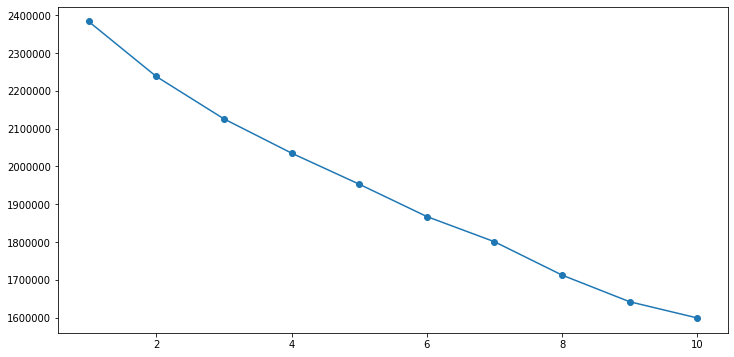

In [109]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.Inertia, marker = "o" )
plt.show()

In [ ]:
# From the above elbow plot we can observe that there is no sudden decrease in slope of the curve right from the initial cluster
# since there is no elbow, we can try with one or two clusters, ideally we can take two clusters.

In [47]:
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=2345)

In [48]:
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)

In [49]:
centroids = kmeans.cluster_centers_
centroids

array([[-2.02281890e-02, -4.60267060e-02, -4.62433524e-02,
         4.06105132e-03,  1.84172329e-02, -1.66300971e-02,
         1.74849612e-02,  1.19971165e+00, -2.29592993e-02,
        -4.57550501e-02,  3.94310291e-02,  9.24096427e-02,
         7.93377111e-02, -9.96186079e-02,  1.12141610e-01,
         1.96686866e-01,  1.86357783e+00,  1.73900231e-01,
        -2.25831310e-01,  1.53929154e+00, -3.40445855e-03,
         6.46243696e-02,  2.81335533e-02, -3.11109743e-01,
         6.05978014e-02, -1.02717858e-01],
       [ 4.24551466e-03,  9.66013589e-03,  9.70560588e-03,
        -8.52337937e-04, -3.86542920e-03,  3.49034315e-03,
        -3.66976297e-03, -2.51796806e-01,  4.81872310e-03,
         9.60312046e-03, -8.27582795e-03, -1.93950379e-02,
        -1.66514865e-02,  2.09080635e-02, -2.35364049e-02,
        -4.12808567e-02, -3.91129775e-01, -3.64983726e-02,
         4.73977248e-02, -3.23068210e-01,  7.14531521e-04,
        -1.35634341e-02, -5.90470126e-03,  6.52960566e-02,
        -1.27

In [50]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [51]:
df_labels

labels
0          1
1          1
2          0
3          0
4          0
...      ...
91681      1
91682      1
91683      1
91684      0
91685      1

[91686 rows x 1 columns]

In [52]:
df1.head()

latitude  longitude  nperpcap     nkill  nkillter    nwound  nwoundte  \
4  -2.298085  -1.413866  0.074550 -0.924496 -0.360005 -0.770908 -0.149083   
6   1.186852  -1.713734  0.212670 -0.924496 -0.360005 -0.770908 -0.149083   
7   1.186596  -1.713507  0.212670 -0.924496 -0.360005 -0.770908 -0.149083   
8   1.214369  -1.716653 -2.436532 -0.924496 -0.360005 -0.770908 -0.149083   
10  1.134659  -1.657487 -5.837894 -0.924496 -0.360005 -0.770908 -0.149083   

    extended  crit1  crit2  crit3  multiple  country  region   city  \
4          0      1      1      1       0.0      217       1   4438   
6          0      1      1      1       0.0      217       1  16594   
7          0      1      1      1       0.0      217       1  13556   
8          0      1      1      1       0.0      217       1  13556   
10         0      1      1      1       0.0      217       1   6095   

    specificity  attacktype1  success  suicide  weaptype1  targtype1  natlty1  \
4           1.0            2        1        0          5          3    217.0   
6           1.0            3        1        0          6         21    217.0   
7           1.0            7        1        0          8          4    217.0   
8           1.0            7        1        0          8          2    217.0   
10          1.0            7        1        0          8          4    217.0   

    individual  gname  claimed  property  doubtterr  
4            0    336      0.0       1.0        0.0  
6            0   1498      0.0       1.0        1.0  
7            0   1016      1.0       1.0        0.0  
8            0   1016      0.0       1.0        0.0  
10           0    819      0.0       1.0        1.0

In [56]:
df1.reset_index(drop=True,inplace=True)

In [57]:
df_labeled = df1.join(df_labels)

In [58]:
df_labeled.head()

latitude  longitude  nperpcap     nkill  nkillter    nwound  nwoundte  \
0 -2.298085  -1.413866  0.074550 -0.924496 -0.360005 -0.770908 -0.149083   
1  1.186852  -1.713734  0.212670 -0.924496 -0.360005 -0.770908 -0.149083   
2  1.186596  -1.713507  0.212670 -0.924496 -0.360005 -0.770908 -0.149083   
3  1.214369  -1.716653 -2.436532 -0.924496 -0.360005 -0.770908 -0.149083   
4  1.134659  -1.657487 -5.837894 -0.924496 -0.360005 -0.770908 -0.149083   

   extended  crit1  crit2  crit3  multiple  country  region   city  \
0         0      1      1      1       0.0      217       1   4438   
1         0      1      1      1       0.0      217       1  16594   
2         0      1      1      1       0.0      217       1  13556   
3         0      1      1      1       0.0      217       1  13556   
4         0      1      1      1       0.0      217       1   6095   

   specificity  attacktype1  success  suicide  weaptype1  targtype1  natlty1  \
0          1.0            2        1        0          5          3    217.0   
1          1.0            3        1        0          6         21    217.0   
2          1.0            7        1        0          8          4    217.0   
3          1.0            7        1        0          8          2    217.0   
4          1.0            7        1        0          8          4    217.0   

   individual  gname  claimed  property  doubtterr labels  
0           0    336      0.0       1.0        0.0      1  
1           0   1498      0.0       1.0        1.0      1  
2           0   1016      1.0       1.0        0.0      0  
3           0   1016      0.0       1.0        0.0      0  
4           0    819      0.0       1.0        1.0      0

In [60]:
df_labeled['labels'].value_counts()

1    75785
0    15901
Name: labels, dtype: int64

#### Comparing original classes and K-Means Algorithm Classes:

In [61]:
print('Original Data Classes:')
print(df1['doubtterr'].value_counts())
print('-'*30)
print('Predicted Data Classes')
print(df_labeled['labels'].value_counts())

Original Data Classes:
0.0    76904
1.0    14782
Name: doubtterr, dtype: int64
------------------------------
Predicted Data Classes
1    75785
0    15901
Name: labels, dtype: int64


In [106]:
# From above comparision of original classes and k-means algorithm classes, it is observed that our algorithm is classifying correctly for most of the classes

### Applying PCA

In [62]:
data_scaled.head()

latitude  longitude  nperpcap     nkill  nkillter    nwound  nwoundte  \
0 -3.206888  -2.414808  0.094340 -1.050995 -0.392554 -0.934829 -0.178394   
1  1.468271  -2.837149  0.318590 -1.050995 -0.392554 -0.934829 -0.178394   
2  1.467928  -2.836830  0.318590 -1.050995 -0.392554 -0.934829 -0.178394   
3  1.505186  -2.841261 -3.982600 -1.050995 -0.392554 -0.934829 -0.178394   
4  1.398253  -2.757929 -9.504981 -1.050995 -0.392554 -0.934829 -0.178394   

   extended     crit1     crit2     crit3  multiple   country    region  \
0 -0.267346  0.107633  0.067838  0.367913 -0.431009  0.906742 -2.744423   
1 -0.267346  0.107633  0.067838  0.367913 -0.431009  0.906742 -2.744423   
2 -0.267346  0.107633  0.067838  0.367913 -0.431009  0.906742 -2.744423   
3 -0.267346  0.107633  0.067838  0.367913 -0.431009  0.906742 -2.744423   
4 -0.267346  0.107633  0.067838  0.367913 -0.431009  0.906742 -2.744423   

       city  specificity  attacktype1   success   suicide  weaptype1  \
0 -1.048900     -0.50431    -0.735911  0.408212 -0.233773  -0.680095   
1  0.630643     -0.50431    -0.212107  0.408212 -0.233773  -0.201823   
2  0.210895     -0.50431     1.883107  0.408212 -0.233773   0.754721   
3  0.210895     -0.50431     1.883107  0.408212 -0.233773   0.754721   
4 -0.819960     -0.50431     1.883107  0.408212 -0.233773   0.754721   

   targtype1   natlty1  individual     gname   claimed  property  
0  -0.869962  0.912611   -0.068964 -1.686042 -0.446827  1.046404  
1   1.874877  0.912611   -0.068964  0.749592 -0.446827  1.046404  
2  -0.717471  0.912611   -0.068964 -0.260714  2.238001  1.046404  
3  -1.022453  0.912611   -0.068964 -0.260714 -0.446827  1.046404  
4  -0.717471  0.912611   -0.068964 -0.673640 -0.446827  1.046404

In [65]:
tar.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: doubtterr, dtype: float64

In [66]:
cov_matrix = np.cov(data_scaled.T)
cov_matrix.shape

(26, 26)

In [67]:
cov_matrix

array([[ 1.00001091e+00, -1.59358206e-01, -2.93969803e-02,
        -1.89727310e-02,  4.88538684e-02,  7.84501773e-02,
         3.97900006e-02, -8.07103043e-03,  3.31166178e-03,
         3.64477223e-03,  7.78796561e-03,  7.34150405e-03,
         4.67392850e-03, -1.30942444e-02,  6.88334875e-03,
        -8.00224430e-03, -7.06617202e-03, -6.16710716e-03,
        -7.06604669e-03, -1.24308427e-02, -3.99453735e-03,
         2.94668101e-03, -8.12696135e-04, -2.18900347e-04,
        -5.09189642e-03,  4.90961110e-03],
       [-1.59358206e-01,  1.00001091e+00,  1.03254107e-01,
        -6.20124528e-02, -2.48836397e-02, -2.57477958e-02,
         3.51014733e-02, -1.44516702e-04, -4.58703713e-03,
         5.34741037e-03,  1.59095139e-02, -1.99239354e-02,
        -1.91554174e-02,  4.25191375e-02, -1.63380350e-02,
         9.61041440e-04, -1.91146365e-02,  2.29967492e-02,
         2.49056709e-03, -1.19433252e-02,  5.52372647e-04,
        -1.87264370e-02, -1.56746652e-02,  2.76872264e-02,
        -1.55

In [111]:
cv_df = pd.DataFrame(cov_matrix)
cv_df

0         1         2         3         4         5         6  \
0   0.555651 -0.084341 -0.013497 -0.012930  0.034090  0.054419  0.028648   
1  -0.084341  0.504121  0.045154 -0.040256 -0.016539 -0.017012  0.024072   
2  -0.013497  0.045154  0.379365  0.024029  0.009935  0.016704  0.004419   
3  -0.012930 -0.040256  0.024029  0.835930  0.394197  0.284013  0.134974   
4   0.034090 -0.016539  0.009935  0.394197  0.876340  0.171861  0.317209   
5   0.054419 -0.017012  0.016704  0.284013  0.171861  0.866007  0.162585   
6   0.028648  0.024072  0.004419  0.134974  0.317209  0.162585  0.932920   
7  -0.006016 -0.000103  0.004418  0.005866  0.004925 -0.005063  0.003693   
8   0.002469 -0.003257 -0.001571 -0.004626  0.000783 -0.000361  0.004555   
9   0.002717  0.003797  0.003531  0.007037 -0.000347  0.007628 -0.001047   
10  0.005805  0.011296 -0.011662 -0.007374 -0.011571  0.000561 -0.014539   
11  0.005472 -0.014146 -0.009452  0.005575  0.006770 -0.000451  0.005845   
12  0.003484 -0.013601 -0.020007  0.001333  0.002660 -0.003069 -0.003742   
13 -0.009761  0.030189  0.057152  0.013660  0.012309  0.006363  0.001940   
14  0.005131 -0.011600 -0.005528  0.003613  0.002444  0.001589  0.004255   
15 -0.005965  0.000682  0.010750  0.006741  0.005051  0.001637  0.013393   
16 -0.005267 -0.013572 -0.011765 -0.000374  0.004826 -0.008990  0.006656   
17 -0.004597  0.016328  0.004077  0.002457 -0.006424  0.008235 -0.006121   
18 -0.005267  0.001768 -0.001803 -0.002341 -0.001555 -0.011808 -0.003306   
19 -0.009266 -0.008480 -0.002872  0.006933  0.010301 -0.004802  0.003198   
20 -0.002978  0.000392  0.006656  0.003157  0.004630 -0.002622  0.000687   
21  0.002197 -0.013296 -0.020730 -0.001464 -0.002031 -0.005536 -0.004548   
22 -0.000606 -0.011129 -0.003104 -0.001068 -0.000517 -0.002360 -0.001285   
23 -0.000163  0.019658  0.014390 -0.006864 -0.007383  0.000541 -0.002203   
24 -0.003796 -0.011031 -0.003386 -0.000400  0.001017 -0.003977  0.003103   
25  0.003660  0.004878 -0.012729 -0.004651 -0.009937  0.007030 -0.006258   

           7         8         9        10        11        12        13  \
0  -0.006016  0.002469  0.002717  0.005805  0.005472  0.003484 -0.009761   
1  -0.000103 -0.003257  0.003797  0.011296 -0.014146 -0.013601  0.030189   
2   0.004418 -0.001571  0.003531 -0.011662 -0.009452 -0.020007  0.057152   
3   0.005866 -0.004626  0.007037 -0.007374  0.005575  0.001333  0.013660   
4   0.004925  0.000783 -0.000347 -0.011571  0.006770  0.002660  0.012309   
5  -0.005063 -0.000361  0.007628  0.000561 -0.000451 -0.003069  0.006363   
6   0.003693  0.004555 -0.001047 -0.014539  0.005845 -0.003742  0.001940   
7   1.000011 -0.013541 -0.007110  0.056004 -0.023952 -0.001191  0.028417   
8  -0.013541  1.000011 -0.007302 -0.039600  0.027496 -0.026960  0.037150   
9  -0.007110 -0.007302  1.000011 -0.024959  0.004354 -0.028398  0.010762   
10  0.056004 -0.039600 -0.024959  1.000011  0.029030 -0.004860 -0.080048   
11 -0.023952  0.027496  0.004354  0.029030  1.000011  0.013988  0.028426   
12 -0.001191 -0.026960 -0.028398 -0.004860  0.013988  1.000011  0.094846   
13  0.028417  0.037150  0.010762 -0.080048  0.028426  0.094846  1.000011   
14  0.050291 -0.009553 -0.000471 -0.030665 -0.004404  0.019583 -0.117762   
15  0.079229  0.016905 -0.005050 -0.066629 -0.003756 -0.083977 -0.077413   
16  0.318163  0.007259 -0.019622 -0.008421  0.076473  0.019739 -0.037251   
17  0.105762 -0.016399 -0.015229  0.011222  0.013866 -0.037644  0.013616   
18 -0.056386  0.022387 -0.000901 -0.039264  0.020669 -0.055141  0.093759   
19  0.243273  0.013437 -0.021844 -0.043581  0.039834  0.003788  0.021111   
20  0.019092 -0.002841 -0.064529  0.263811  0.035701  0.040203  0.062397   
21  0.018875 -0.018862 -0.019663 -0.097716  0.004786  0.632532  0.083466   
22 -0.015253 -0.034394  0.002325  0.020469  0.004375  0.044953 -0.103204   
23 -0.085183 -0.042793  0.015825  0.085758 -0.144680 -0.114879 -0.145034   
24  0.024192  0.034608  0.005594 -0.064954  0.103075 -0.04

In [68]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print(eigenvectors)

[[ 9.84388068e-05 -8.77660550e-02 -1.91381980e-02 -8.02121404e-03
   2.80341618e-03  1.67794231e-03  4.40032438e-03 -2.13044008e-01
   1.06942633e-01 -2.96564842e-01 -3.68864177e-01  2.82358248e-01
  -7.72245055e-03 -1.97496798e-03  3.53061321e-02  3.33942287e-01
  -2.08067462e-01 -2.28123051e-02 -1.31663672e-01  1.75942199e-01
   3.08525919e-01 -1.43009379e-01 -2.56213402e-01  8.24842448e-02
  -4.21243375e-01 -2.46593784e-01]
 [-4.25598360e-02  5.48713941e-02  3.72717588e-02 -5.33115733e-04
  -4.46468895e-03  2.10009273e-03 -4.87991263e-02  2.80737080e-01
   4.43355206e-02  4.04075613e-01  3.67741927e-01 -2.15072058e-01
  -2.48848877e-02 -1.96696446e-02  5.42958370e-02  3.51353568e-01
  -2.47396387e-01 -4.84786773e-02 -3.56343146e-01  3.23703644e-01
  -1.59125291e-01  2.79187939e-02  1.55999343e-02 -4.12086045e-02
  -3.23111793e-01 -1.03296875e-01]
 [-1.93350099e-02 -5.41592592e-02  4.27853164e-02  3.63816012e-03
  -1.89973116e-03 -2.91533816e-03  1.28942003e-02  3.03981483e-01
  -2.2

In [69]:
print(eigenvalues)

[1.99600181 1.86814432 1.74105118 1.52807899 0.29531798 0.35434391
 1.38477826 1.31757918 0.45390035 1.24369229 1.16320424 1.11146936
 0.56596947 0.59224571 0.65599879 0.73170302 0.73803036 0.79794593
 0.82409661 0.84867682 1.01442382 1.00304571 0.96889971 0.94463343
 0.92760026 0.92945206]


In [70]:
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[ :, i]) for i in range(len(eigenvalues))]
eigen_pairs

[(1.9960018123167798,
  array([ 9.84388068e-05, -4.25598360e-02, -1.93350099e-02,  7.01500300e-02,
          7.67761705e-02,  3.76612528e-02,  5.45270763e-02,  3.81927198e-01,
          2.05730536e-02, -3.67788004e-02, -6.84799293e-02,  1.06654125e-01,
          1.26525550e-01,  3.74929122e-02,  1.02751476e-01,  1.35129055e-01,
          5.82209346e-01,  7.15596531e-02, -5.66034477e-02,  5.60859960e-01,
          1.09361492e-02,  1.41681189e-01,  2.88551899e-02, -2.67408101e-01,
          1.22265347e-01, -5.76932509e-02])),
 (1.868144318194928,
  array([-8.77660550e-02,  5.48713941e-02, -5.41592592e-02, -5.41634954e-01,
         -5.60159179e-01, -4.35322773e-01, -4.14359245e-01,  4.67039988e-02,
         -4.87955795e-04, -1.56314021e-02,  1.73295278e-02,  5.91405269e-03,
          3.09837502e-02, -1.67837669e-02,  2.91896798e-03, -2.88113977e-03,
          7.98020852e-02,  1.93068316e-02, -2.05252949e-04,  6.85251271e-02,
          2.50576138e-03,  3.54141062e-02,  1.11916615e-02, -2.7

In [71]:
eigen_pairs_sorted=sorted(eigen_pairs,reverse=True)
eigen_pairs_sorted

[(1.9960018123167798,
  array([ 9.84388068e-05, -4.25598360e-02, -1.93350099e-02,  7.01500300e-02,
          7.67761705e-02,  3.76612528e-02,  5.45270763e-02,  3.81927198e-01,
          2.05730536e-02, -3.67788004e-02, -6.84799293e-02,  1.06654125e-01,
          1.26525550e-01,  3.74929122e-02,  1.02751476e-01,  1.35129055e-01,
          5.82209346e-01,  7.15596531e-02, -5.66034477e-02,  5.60859960e-01,
          1.09361492e-02,  1.41681189e-01,  2.88551899e-02, -2.67408101e-01,
          1.22265347e-01, -5.76932509e-02])),
 (1.868144318194928,
  array([-8.77660550e-02,  5.48713941e-02, -5.41592592e-02, -5.41634954e-01,
         -5.60159179e-01, -4.35322773e-01, -4.14359245e-01,  4.67039988e-02,
         -4.87955795e-04, -1.56314021e-02,  1.73295278e-02,  5.91405269e-03,
          3.09837502e-02, -1.67837669e-02,  2.91896798e-03, -2.88113977e-03,
          7.98020852e-02,  1.93068316e-02, -2.05252949e-04,  6.85251271e-02,
          2.50576138e-03,  3.54141062e-02,  1.11916615e-02, -2.7

In [72]:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [  7.67684632  14.8619384   21.55821607  27.43537884  32.76139098
  37.82894795  42.61232765  47.08614132  51.36097685  55.26256438
  59.12039043  62.84688712  66.48005298  70.0548296   73.62248401
  76.88659001  80.05615781  83.12514715  85.9636945   88.77790619
  91.30095093  93.57879421  95.75557611  97.50132766  98.864174
 100.        ]


In [73]:
li=[]
for i in list(cum_var_exp):
    if(i<=80):
        li.append(i)
    else:
        break
print(li)

[7.676846316704002, 14.86193840415054, 21.55821606787773, 27.435378841475572, 32.76139097745744, 37.82894795374202, 42.612327653884265, 47.08614131812581, 51.36097685436819, 55.262564379378794, 59.12039043296406, 62.84688711882679, 66.48005297580137, 70.0548296049136, 73.62248400733192, 76.88659001309786]


In [74]:
len(li)

16

In [75]:
eigvalues_sort = [eigen_pairs_sorted[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eigen_pairs_sorted[index][1] for index in range(len(eigenvalues))]

In [76]:
eigvectors_sort

[array([ 9.84388068e-05, -4.25598360e-02, -1.93350099e-02,  7.01500300e-02,
         7.67761705e-02,  3.76612528e-02,  5.45270763e-02,  3.81927198e-01,
         2.05730536e-02, -3.67788004e-02, -6.84799293e-02,  1.06654125e-01,
         1.26525550e-01,  3.74929122e-02,  1.02751476e-01,  1.35129055e-01,
         5.82209346e-01,  7.15596531e-02, -5.66034477e-02,  5.60859960e-01,
         1.09361492e-02,  1.41681189e-01,  2.88551899e-02, -2.67408101e-01,
         1.22265347e-01, -5.76932509e-02]),
 array([-8.77660550e-02,  5.48713941e-02, -5.41592592e-02, -5.41634954e-01,
        -5.60159179e-01, -4.35322773e-01, -4.14359245e-01,  4.67039988e-02,
        -4.87955795e-04, -1.56314021e-02,  1.73295278e-02,  5.91405269e-03,
         3.09837502e-02, -1.67837669e-02,  2.91896798e-03, -2.88113977e-03,
         7.98020852e-02,  1.93068316e-02, -2.05252949e-04,  6.85251271e-02,
         2.50576138e-03,  3.54141062e-02,  1.11916615e-02, -2.74330523e-02,
         1.60660860e-02,  1.24061087e-02]),


In [77]:
P_reduce = np.array(eigvectors_sort[0:16]).transpose()
P_reduce

array([[ 9.84388068e-05, -8.77660550e-02, -1.91381980e-02,
        -8.02121404e-03,  4.40032438e-03, -2.13044008e-01,
        -2.96564842e-01, -3.68864177e-01,  2.82358248e-01,
         3.08525919e-01, -1.43009379e-01, -2.56213402e-01,
         8.24842448e-02, -2.46593784e-01, -4.21243375e-01,
         1.75942199e-01],
       [-4.25598360e-02,  5.48713941e-02,  3.72717588e-02,
        -5.33115733e-04, -4.87991263e-02,  2.80737080e-01,
         4.04075613e-01,  3.67741927e-01, -2.15072058e-01,
        -1.59125291e-01,  2.79187939e-02,  1.55999343e-02,
        -4.12086045e-02, -1.03296875e-01, -3.23111793e-01,
         3.23703644e-01],
       [-1.93350099e-02, -5.41592592e-02,  4.27853164e-02,
         3.63816012e-03,  1.28942003e-02,  3.03981483e-01,
         2.61389723e-01,  2.05521751e-01,  4.30753157e-03,
         3.18500031e-01, -2.69940554e-01, -5.45633412e-01,
         2.60790101e-01, -1.42764505e-01,  5.06807338e-02,
         9.25385941e-02],
       [ 7.01500300e-02, -5.41634954e

In [78]:
X_pca = np.dot(data_scaled,P_reduce)
X_pca.shape

(91686, 16)

In [79]:
from sklearn.model_selection import train_test_split

In [81]:
#train test split and scaling
X_train, X_test, y_train, y_test = train_test_split(data_scaled, tar,test_size = 0.3, random_state = 7)

In [82]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression().fit(X_train,y_train)

In [83]:
y_pred=logreg.predict(X_test)

In [84]:
logreg.score(X_train,y_train)

0.9734185104393892

In [85]:
logreg.score(X_test,y_test)

0.9741147386024868

In [86]:
# with PCA columns

In [88]:
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(X_pca, tar,test_size = 0.3, random_state = 7)

### Logistic Regression on PCA Dimesions

In [89]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression().fit(Xpca_train,ypca_train)

In [90]:
ypca_pred=logreg.predict(Xpca_test)

In [91]:
ypca_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [92]:
logreg.score(Xpca_train,ypca_train) #training score

0.9729199127454036

In [93]:
logreg.score(Xpca_test,ypca_test) #test score

0.9736057587435468

In [95]:
import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
sklearn.metrics.accuracy_score(ypca_test,ypca_pred)

0.9736057587435468

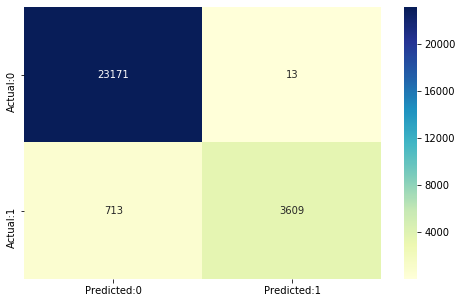

In [96]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm_pca=confusion_matrix(ypca_test,ypca_pred)
conf_matrix=pd.DataFrame(data=cm_pca,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [97]:
print('Logistic Regression:')
print(classification_report(ypca_test, ypca_pred))

Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     23184
         1.0       1.00      0.84      0.91      4322

    accuracy                           0.97     27506
   macro avg       0.98      0.92      0.95     27506
weighted avg       0.97      0.97      0.97     27506



#### Applying Random Forest Classifier on PCA dimensions

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf_pca = RandomForestClassifier()
rf_pca.fit(Xpca_train,ypca_train)
pred_rf_pca = rf_pca.predict(Xpca_test)
sklearn.metrics.accuracy_score(ypca_test,pred_rf_pca)

0.9737148258561769

In [100]:
print(classification_report(ypca_test,pred_rf_pca))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     23184
         1.0       1.00      0.84      0.91      4322

    accuracy                           0.97     27506
   macro avg       0.98      0.92      0.95     27506
weighted avg       0.97      0.97      0.97     27506



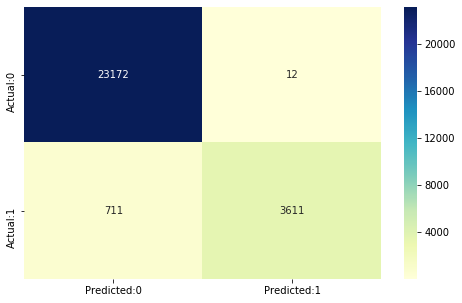

In [101]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm_pca_rf=confusion_matrix(ypca_test,pred_rf_pca)
conf_matrix=pd.DataFrame(data=cm_pca_rf,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [102]:
confusion_matrix(ypca_test,pred_rf_pca)

array([[23172,    12],
       [  711,  3611]], dtype=int64)

# Checking sensitivity scores with different probability thresholds

In [98]:
from sklearn.preprocessing import binarize
for i in range(1,10):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(Xpca_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(ypca_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')
    

With 0.1 threshold the Confusion Matrix is  
 [[20760  2424]
 [  621  3701]] 
 with 24461 correct predictions and 621 Type II errors( False Negatives) 

 Sensitivity:  0.8563165201295696 Specificity:  0.8954451345755694 



With 0.2 threshold the Confusion Matrix is  
 [[22783   401]
 [  684  3638]] 
 with 26421 correct predictions and 684 Type II errors( False Negatives) 

 Sensitivity:  0.8417399352151782 Specificity:  0.9827035886818496 



With 0.3 threshold the Confusion Matrix is  
 [[23083   101]
 [  703  3619]] 
 with 26702 correct predictions and 703 Type II errors( False Negatives) 

 Sensitivity:  0.8373438223044887 Specificity:  0.9956435472739821 



With 0.4 threshold the Confusion Matrix is  
 [[23148    36]
 [  709  3613]] 
 with 26761 correct predictions and 709 Type II errors( False Negatives) 

 Sensitivity:  0.8359555761221656 Specificity:  0.9984472049689441 



With 0.5 threshold the Confusion Matrix is  
 [[23171    13]
 [  713  3609]] 
 with 26780 correct predic

In [ ]:
# Maximum sensitivity can be achieved is 85% with 10% probability threshold